In [1]:
# import packages
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('../src')
outdata_path = '../outdata/'

In [2]:
import parameters as p
from MM_Traj_Utils import LoadTrajFromPath, FindHomeRunNodes
from MM_Maze_Utils import NewMaze
from plot_utils import plot_nodes_vs_time, plot_maze_stats

In [18]:
from collections import defaultdict

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
%matplotlib inline

In [5]:
ma = NewMaze(6)

In [6]:
p.UnrewNames

['B5', 'B6', 'B7', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9']

### Analyze 0=>1 and 0=>2

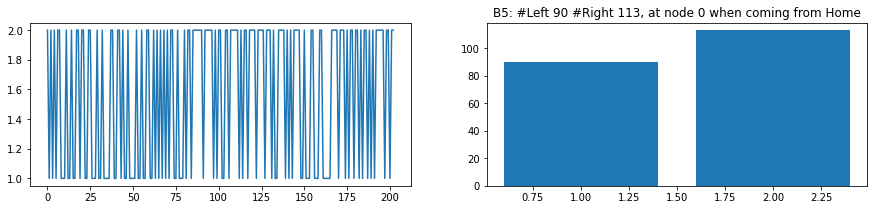

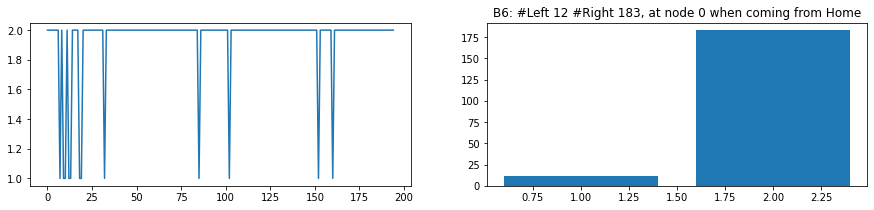

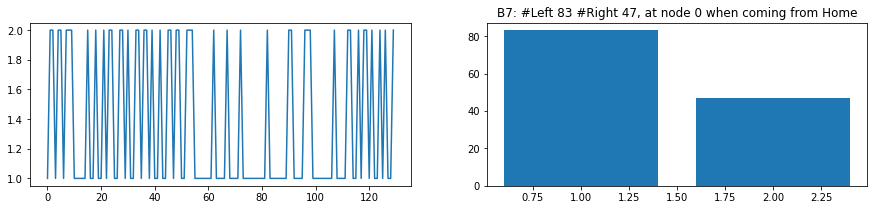

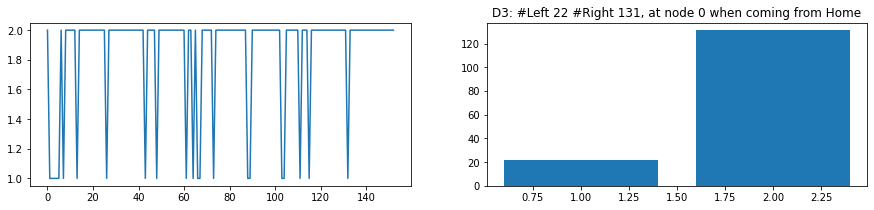

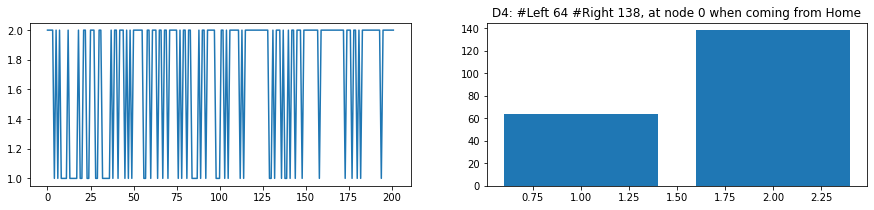

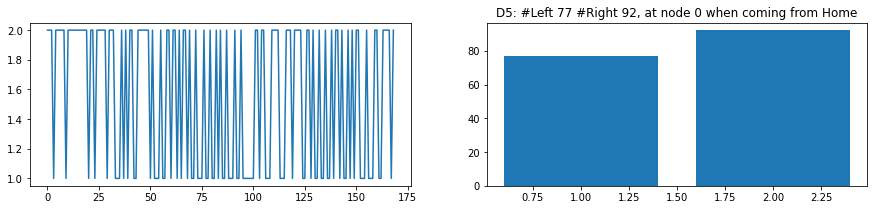

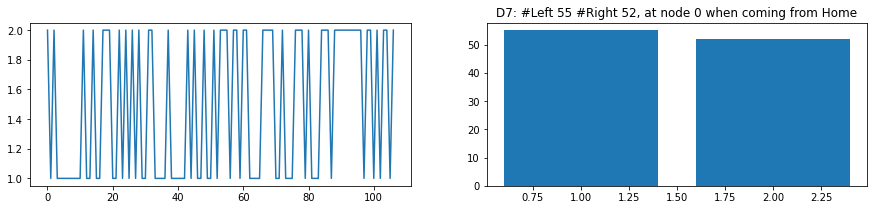

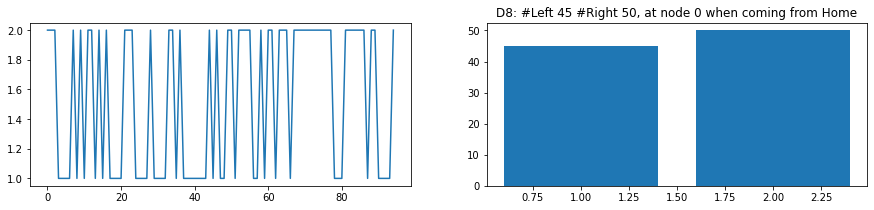

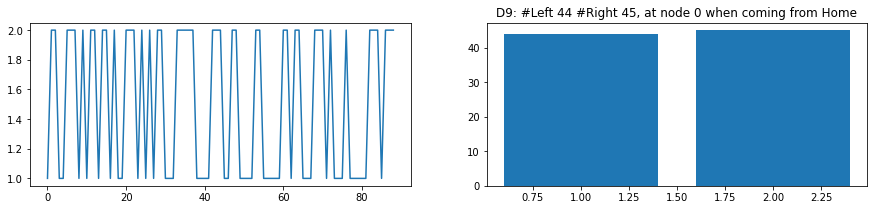

In [9]:
for sub in p.UnrewNamesSub:
    tf=LoadTrajFromPath(outdata_path + f'{sub}-tf')
    a = []
    for i, t in enumerate(tf.no):
        if (t[0, 0] == 0) and (t[1, 0] in [1, 2]):
            a.append(t[1, 0])
    fig, ax = plt.subplots(1, 2, figsize=(15, 3))
    ax[0].plot(a)
    ax[1].set_title(f'{sub}: #Left {a.count(1)} #Right {a.count(2)}, at node 0 when coming from Home')
    
    ax[1].bar([1, 2], [a.count(1), a.count(2)])

### Analyze number of nodes between revisits to a node

In [140]:
def get_revisits(sub, phase='all'):
    tf=LoadTrajFromPath(outdata_path + f'{sub}-tf')
    revisit = defaultdict(list)
    
    if phase == 'all':
        trajs = tf.no
    elif phase == 'first_half':
        trajs = tf.no[:len(tf.no)//2]
    elif phase == 'second_half':
        trajs = tf.no[len(tf.no)//2:]
    elif phase == 'first_third':
        trajs = tf.no[:len(tf.no)//3]
    elif phase == 'second_third':
        trajs = tf.no[len(tf.no)//3:2*len(tf.no)//3]
    elif phase == 'third_third':
        trajs = tf.no[2*len(tf.no)//3:]
    
    for t in trajs:
        node_seq = t[:, 0]
    #     print(node_seq)
        for node in p.ALL_VISITABLE_NODES:
            visits_node = np.where(node_seq == node)[0]
            if len(visits_node) >= 2:
                revisit[node] += list(np.diff(visits_node) - 1)
    #             print(node, visits_node)
    #         print("next traj")
    return revisit

0 [443, 289, 59, 1, 3, 187, 1, 93, 1, 53, 21, 3, 1, 63, 45, 131, 1, 87, 57, 51, 139, 33, 27, 1, 31, 33, 59, 1, 109, 97, 29, 115, 1, 45, 83, 51, 45, 31, 155, 13, 33, 57, 1, 19, 29, 17, 37, 49, 23, 73, 31, 37, 31, 31, 3, 35, 43, 85, 35, 117, 1, 3, 1, 13, 25, 99, 17, 1, 99, 63, 73, 1, 3, 65, 63, 55, 47, 41, 9, 25, 11, 9, 17, 3, 19, 3, 169, 39, 33, 45, 21, 17, 11, 27, 11, 11, 125, 41, 1, 37, 11, 31, 5, 19, 23, 31, 5, 37, 23, 3, 9, 7, 17, 17, 21, 13, 21, 23, 1, 27, 139, 11, 31, 11, 7, 91, 1, 55, 23, 19, 61, 47, 1, 17, 35, 1, 9, 31, 17, 51, 11, 61, 99, 25, 5, 21, 13, 1, 81, 1, 27, 19, 15, 225, 41, 15, 11, 1, 31, 113, 77, 1, 7, 1, 15, 15, 141, 19, 45, 31, 127, 41, 63, 1, 45, 23, 51, 31, 5, 5, 25, 7, 11, 29, 1, 13, 57, 1, 67, 5, 33, 85, 27, 7, 1, 9, 13, 15, 5, 51, 59, 1, 1, 25, 1, 1, 5, 9, 5, 41, 45, 31, 47, 49, 53, 13, 81, 19, 7, 35, 1, 57, 5, 19, 1, 31, 13, 37, 9, 37, 17, 17, 39, 1, 5, 153, 15, 37, 5, 81, 11, 35, 49, 23, 37, 37, 5, 83, 31, 47, 133, 1, 57, 87, 33, 15, 1]


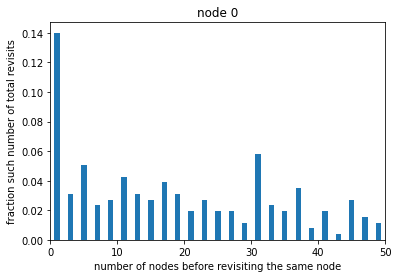

1 [421, 19, 5, 135, 11, 37, 1, 11, 73, 43, 55, 53, 13, 61, 61, 35, 25, 29, 35, 41, 15, 107, 23, 3, 113, 81, 43, 33, 15, 97, 1, 37, 55, 17, 15, 47, 35, 13, 21, 33, 35, 29, 33, 45, 55, 25, 1, 33, 41, 33, 33, 5, 1, 3, 11, 97, 97, 15, 55, 3, 1, 67, 21, 11, 27, 13, 15, 15, 23, 15, 1, 1, 27, 125, 13, 41, 15, 15, 19, 25, 9, 9, 43, 29, 13, 25, 35, 29, 7, 17, 29, 9, 11, 1, 1, 7, 15, 1, 19, 19, 117, 19, 13, 15, 9, 5, 9, 79, 3, 53, 11, 9, 21, 59, 15, 1, 13, 9, 9, 1, 7, 15, 1, 49, 9, 63, 57, 39, 19, 11, 13, 21, 11, 25, 5, 17, 7, 1, 1, 15, 17, 31, 179, 11, 9, 9, 19, 77, 33, 61, 13, 5, 13, 17, 81, 57, 17, 1, 13, 29, 11, 17, 1, 125, 33, 19, 7, 25, 17, 1, 19, 13, 7, 7, 3, 7, 15, 5, 13, 27, 43, 11, 23, 41, 31, 1, 1, 57, 23, 5, 7, 13, 29, 19, 61, 7, 15, 3, 7, 7, 27, 11, 29, 13, 9, 19, 9, 35, 15, 21, 13, 15, 7, 55, 17, 33, 25, 29, 17, 29, 11, 23, 21, 9, 3, 15, 41, 33, 117, 13, 1, 23, 11, 79, 9, 1, 33, 47, 25, 35, 29, 27, 63, 39, 11, 43, 31]


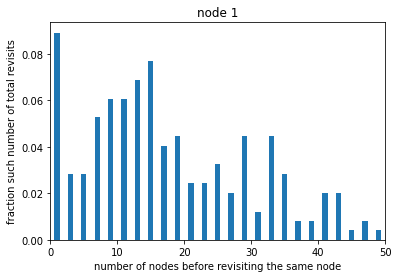

2 [225, 61, 15, 41, 3, 1, 189, 61, 29, 35, 15, 19, 61, 43, 133, 85, 49, 141, 9, 9, 11, 29, 31, 61, 29, 65, 43, 49, 29, 157, 11, 31, 59, 27, 13, 21, 51, 21, 29, 29, 1, 37, 41, 5, 23, 15, 101, 61, 5, 63, 65, 53, 39, 7, 9, 7, 17, 37, 35, 43, 15, 9, 9, 39, 9, 3, 21, 33, 3, 35, 5, 15, 11, 21, 25, 9, 17, 63, 45, 29, 59, 101, 23, 3, 13, 227, 39, 13, 13, 39, 65, 49, 3, 9, 11, 3, 25, 11, 3, 53, 57, 3, 47, 11, 5, 3, 11, 7, 15, 19, 37, 3, 3, 21, 39, 35, 1, 3, 81, 33, 45, 85, 13]


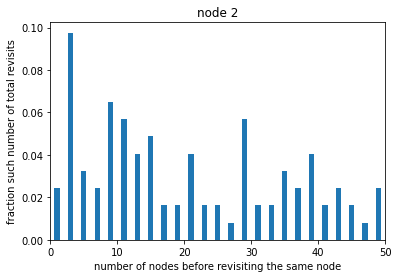

3 [1, 75, 39, 27, 37, 11, 163, 21, 37, 9, 17, 21, 19, 11, 23, 11, 17, 55, 11, 63, 11, 15, 31, 17, 21, 37, 55, 11, 1, 9, 33, 9, 9, 35, 11, 13, 17, 47, 21, 19, 35, 13, 99, 11, 15, 17, 11, 57, 13, 13, 5, 9, 43, 27, 39, 35, 11, 7, 11, 85, 9, 53, 75, 19, 13, 71, 39, 11, 57, 13, 41, 31, 11, 7, 83, 15, 15, 9, 1, 31, 31, 13, 7, 11, 11, 7, 5, 13, 27, 13, 9, 11, 7, 13, 23, 15, 11, 67, 11, 135, 29, 7, 9, 65, 19, 17, 21, 11, 101, 17, 17, 19, 11, 15, 3, 15, 35, 63, 7, 17, 13, 9, 17, 5, 1, 13, 25, 9, 29, 9, 33, 21, 3, 17, 13, 1, 25, 27, 7, 19, 13, 19, 13, 9, 43, 9, 31, 15, 11, 27, 11, 9, 7, 87, 27, 21, 15, 39, 21, 15, 15, 41, 3, 53, 7, 31, 9]


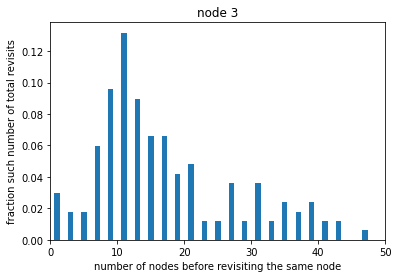

4 [15, 1, 33, 45, 19, 1, 29, 1, 13, 13, 21, 9, 75, 3, 19, 11, 5, 15, 9, 5, 15, 9, 1, 99, 19, 3, 27, 79, 11, 1, 21, 65, 11, 17, 3, 35, 9, 15, 9, 3, 11, 1, 15, 13, 33, 15, 7, 7, 3, 15, 11, 9, 19, 1, 103, 13, 9, 11, 13, 5, 13, 17, 35, 3, 5, 9, 15, 39, 13, 13, 11, 13, 61, 91, 9, 1, 9, 15, 11, 17, 13, 21, 13, 25, 127, 11, 59, 13, 17, 23, 7, 7, 45, 27, 15, 23, 11, 9, 11, 27, 9, 15, 9, 17, 9, 3, 5, 13, 3, 17, 17, 7, 9, 13, 7, 3, 7, 85, 7, 43, 9, 33, 57, 13, 17, 7, 13, 3, 13, 33, 7, 123, 9, 13, 13, 3, 13, 11, 23, 9, 27, 3, 5, 5, 13, 19, 5, 23, 181, 9, 7, 17, 13, 17, 11, 3, 43, 35, 1, 13, 17, 27, 9, 31, 21, 5, 3, 11, 11, 9, 5, 5, 3, 41, 21, 27, 1, 3, 59, 21, 5, 11, 17, 9, 5, 5, 37, 9, 11, 17, 7, 13, 23, 11, 5, 15, 23, 15, 9, 19, 11, 1, 13, 31, 11, 27, 9, 7, 15, 17, 27, 25, 65, 9, 17, 9, 9, 29]


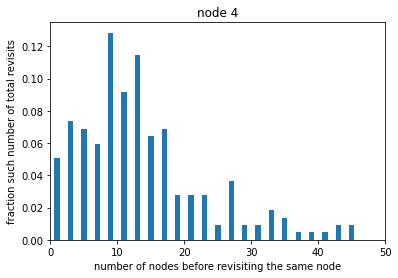

5 [1, 49, 49, 11, 21, 11, 75, 13, 17, 7, 5, 17, 9, 13, 19, 23, 15, 7, 17, 13, 19, 11, 11, 7, 27, 27, 7, 31, 15, 9, 19, 9, 15, 9, 11, 13, 13, 39, 13, 5, 5, 13, 21, 13, 31, 27, 9, 31, 9, 9, 67, 27, 23, 13, 13, 9, 5, 7, 5, 15, 35, 37, 41, 13, 7, 7, 9, 15, 11, 7, 1, 7, 11, 35, 1, 17, 15, 1, 1, 13, 9, 19, 7, 13, 1, 7, 15, 65, 7, 35, 15, 11, 11, 19, 1, 23, 103, 21, 1, 11, 229, 27, 9, 1, 9, 11, 13, 23, 15, 15, 15, 1, 7, 9, 1, 9, 13, 9, 1, 55, 13, 41, 1, 45, 9, 3, 1, 9, 5, 13, 21, 9, 25, 1, 1, 19, 41, 9, 23, 3, 1, 79, 35, 17, 25, 39, 29, 13, 11]


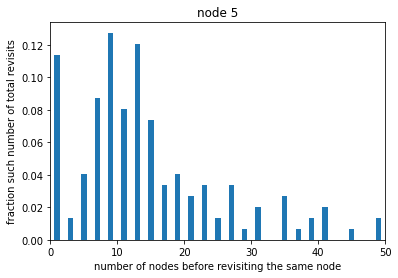

6 [59, 13, 15, 33, 9, 13, 19, 17, 17, 21, 1, 35, 11, 143, 7, 11, 9, 9, 19, 11, 15, 31, 9, 15, 11, 7, 11, 53, 19, 7, 19]


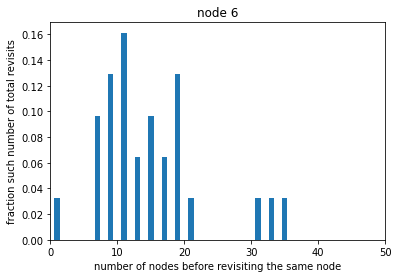

7 [21, 29, 21, 41, 25, 39, 9, 165, 19, 9, 9, 21, 3, 5, 11, 9, 13, 15, 133, 9, 17, 19, 9, 15, 9, 15, 9, 57, 9, 11, 19, 11, 7, 37, 9, 11, 19, 17, 15, 11, 13, 1, 1, 1, 57, 11, 13, 9, 59, 11, 15, 3, 41, 37, 37, 9, 9, 9, 7, 17, 17, 19, 73, 7, 17, 11, 1, 7, 9, 19, 5, 9, 11, 13, 7, 5, 15, 21, 9, 137, 17, 9, 5, 55, 7, 7, 9, 19, 15, 3, 15, 19, 17, 9, 13, 21, 21, 11, 65, 5, 11, 11, 23, 7, 9, 21, 15, 23, 25, 5, 11, 17, 11, 11, 41, 29, 13, 11, 13, 7, 5, 1, 67, 9, 19, 5, 7, 41, 19, 13, 39, 5, 7, 21]


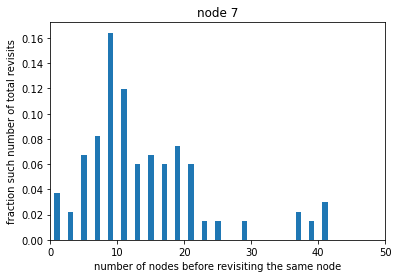

8 [77, 37, 29, 19, 15, 13, 21, 17, 7, 13, 37, 17, 17, 25, 23, 19, 15, 7, 7, 7, 23, 11, 5, 9, 75, 5, 3, 77, 13, 9, 7, 1, 9, 5, 21, 9, 5, 7, 35, 7, 11, 11, 15, 5, 7, 7, 5, 11, 9, 17, 15, 11, 7, 5, 19, 53, 9, 43, 7, 11, 37, 5, 7, 3, 7, 1, 3, 41, 1, 7, 59, 1, 9, 13, 9, 5, 9, 33, 5, 3, 3, 1, 3, 7, 1, 29, 33, 11, 5, 3, 11, 29, 11, 9, 3, 9, 93, 133, 7, 9, 1, 3, 9, 121, 15, 13, 37, 47, 13, 9, 5, 7, 15, 1, 1, 7, 27, 19, 1, 11, 9, 7, 7, 9, 9, 5, 19, 5, 37, 13, 1, 51, 7]


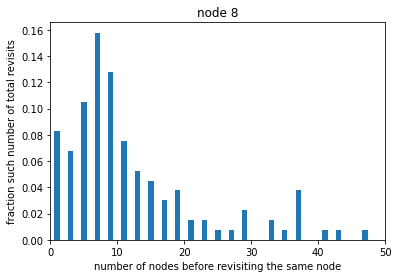

9 [13, 23, 1, 5, 47, 5, 11, 3, 15, 5, 5, 17, 11, 7, 77, 1, 21, 9, 3, 9, 11, 3, 17, 7, 103, 17, 7, 17, 81, 1, 7, 9, 9, 63, 13, 15, 7, 17, 7, 5, 9, 1, 11, 11, 31, 17, 5, 13, 7, 21, 105, 11, 9, 15, 3, 15, 7, 13, 41, 11, 15, 9, 11, 155, 7, 13, 13, 11, 7, 11, 5, 5, 15, 5, 1, 129, 7, 1, 9, 15, 17, 11, 9, 9, 11, 9, 15, 9, 1, 9, 3, 7, 3, 9, 1, 7, 7, 7, 5, 1, 5, 87, 5, 19, 9, 9, 13, 1, 1, 9, 19, 5, 11, 5, 11, 7, 15, 11, 1, 9, 63, 1, 3, 7, 11, 21, 3, 5, 9, 5, 15, 1, 5, 27, 7, 17, 11, 23, 3, 9, 9, 11, 3, 3, 1, 11, 7, 25, 3, 9, 7, 3, 3, 39, 7, 5, 3, 11, 1, 21, 13, 11, 5, 13, 11, 29, 9, 29, 7, 5, 13, 25, 15, 7, 67, 7, 19, 7, 7, 5, 21]


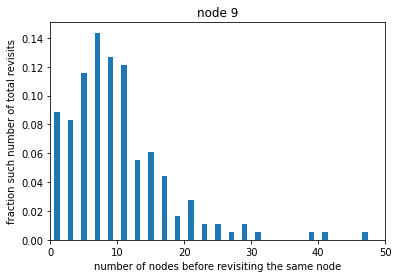

10 [15, 27, 21, 31, 29, 11, 7, 7, 9, 13, 3, 7, 7, 7, 5, 11, 121, 1, 9, 23, 13, 19, 7, 5, 11, 1, 13, 5, 1, 1, 9, 11, 5, 121, 7, 1, 9, 11, 55, 1, 19, 7, 9, 15, 9, 1, 5, 1, 9, 11, 13, 1, 15, 5, 5, 5, 7, 11, 1, 7, 13, 1, 5, 11, 39, 1, 7, 23, 7, 5, 135, 11, 3, 7, 7, 9, 11, 183, 7, 9, 1, 7, 1, 19, 11, 9, 7, 3, 19, 25, 1, 31, 1, 5, 65, 19, 5, 9, 9, 15, 11, 25, 9, 7, 15, 15]


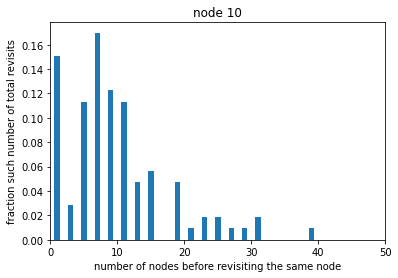

11 [15, 15, 9, 5, 51, 9, 23, 9, 5, 9, 15, 11, 3, 17, 15, 15, 9, 7, 13, 3, 5, 5, 25, 29, 5, 7, 5, 7, 7, 11, 3, 7, 3, 7, 15, 9, 29, 11, 7, 97, 7, 13, 11, 5, 3, 1, 7, 3, 33, 5, 5, 13, 9, 15, 11, 9, 23, 9, 17, 3, 9, 11, 7, 7, 21, 13, 11, 39, 3, 9, 13, 13, 7, 5, 13, 9, 37, 31, 11]


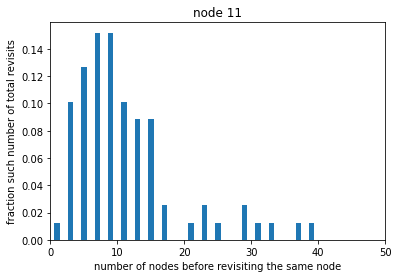

12 [51, 25, 19, 1, 13, 19, 13, 29, 15, 21, 5, 11, 19, 5, 7, 13, 3, 25, 13, 5, 19, 11, 21, 9, 25, 11, 11, 5, 7, 11, 5, 13, 9, 11, 11, 7, 3, 17, 1, 11, 17, 11, 7, 33, 7, 79, 5, 19, 5, 3, 1, 15, 5, 1, 3, 9, 23, 11, 5, 7, 17, 9, 5, 5, 49, 13, 1, 11, 7, 17, 5, 15, 5, 13, 67, 5, 13, 9, 21, 129, 19, 9, 231, 25, 9, 11, 13, 17, 13, 5, 7, 7, 7, 57, 11, 43, 7, 1, 7, 11, 23, 7, 17, 43, 7, 59, 17, 37, 15, 13, 13, 9]


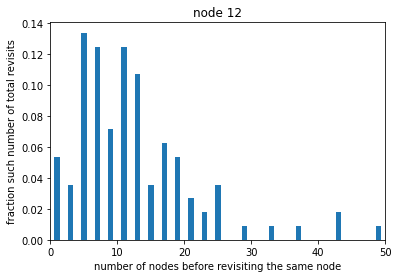

13 [17, 7, 5, 17, 7, 7, 9, 9, 1, 7, 145, 5, 5, 11, 13, 7, 7, 1, 5, 7, 9]


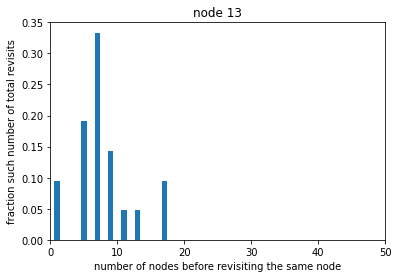

14 [27, 11, 17, 11, 13, 35, 7, 11, 15, 23, 19, 13, 177, 7, 7, 9, 19, 9, 11, 1, 9, 55, 13, 3, 5]


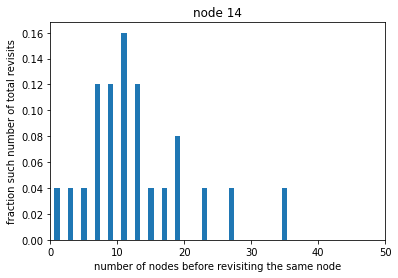

15 [1, 7, 9, 31, 3, 3, 5, 5, 43, 3, 3, 3, 11, 41, 7, 167, 1, 5, 7, 1, 3, 3, 33, 1, 3, 1, 3, 25, 3, 3, 5, 135, 3, 3, 19, 1, 9, 5, 1, 7, 3, 1, 7, 1, 5, 17, 3, 3, 1, 1, 3, 3, 3, 1, 3, 5, 39, 5, 1, 5, 5, 3, 1, 1, 1, 1, 59, 1, 3, 3, 1, 5, 89, 1, 1, 7, 3, 3, 1, 1, 9, 1, 5, 1, 1, 1, 1, 1, 5, 3, 1, 1, 1, 5, 3, 39, 1, 5, 11, 7, 1, 1, 1, 9, 3, 1, 5, 3, 1, 1, 1, 1, 1, 3, 5, 1, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 5, 1, 7, 5, 7, 27, 1, 5, 1, 1, 1, 3, 1, 3, 5, 5, 1, 1, 7, 1, 5, 1, 1, 3, 1, 3, 7, 5, 1, 3, 3, 139, 3, 3, 7, 3, 1, 9, 3, 3, 5, 3, 7, 5, 9, 7, 21, 1, 3, 7, 7, 5, 21, 3, 9, 1, 7, 3, 3, 1, 1, 23, 1, 1, 3, 5, 1, 3, 79, 3, 3, 3, 1, 1, 1, 5, 3, 3, 7, 5, 1, 3, 7, 3, 1, 5, 1, 3, 1, 1, 3, 3, 5, 3, 11, 7, 1, 1, 5, 1, 5, 7, 5, 1, 1, 13, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 3, 5, 1, 1, 1, 3, 3, 3, 3, 1, 3, 7, 3, 3, 5, 1, 1, 1, 1, 1, 3, 1, 3, 3, 1, 69, 1, 5, 1, 9, 5, 5, 43, 1, 11, 3, 3, 3, 3, 3, 1, 1, 1]


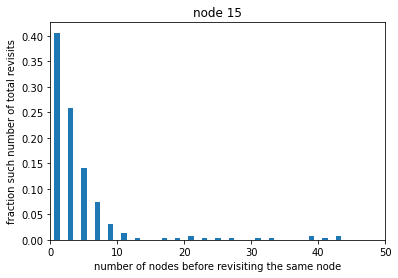

16 [3, 9, 5, 5, 1, 7, 27, 1, 1, 3, 3, 3, 5, 3, 69, 1, 5, 3, 5, 33, 5, 39, 5, 1, 3, 3, 3, 3, 17, 1, 3, 3, 5, 5, 3, 3, 1, 3, 1, 3, 1, 1, 5, 3, 5, 3, 3, 3, 5, 1, 1, 1, 47, 1, 1, 7, 3, 5, 3, 1, 3, 3, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 3, 1]


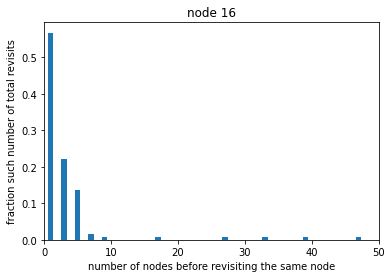

17 [9, 1, 5, 31, 5, 1, 5, 1, 1, 1, 19, 1, 3, 15, 1, 3, 5, 3, 3, 1, 7, 3, 1, 19, 3, 1, 1, 3, 1, 1, 1, 7, 15, 25, 3, 1, 1, 9, 3, 1, 5, 7, 77, 3, 83, 3, 7, 7, 9, 1, 5, 7, 5, 13, 11, 1, 1, 3, 1, 37, 5, 13, 5, 3, 17, 3, 5, 3, 3, 3, 19, 5, 1, 3, 1, 1, 7, 5, 3, 7, 7, 1, 55, 7, 5, 3, 1, 1, 1, 1, 1, 1, 7, 1, 5, 3, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 7, 3, 1, 5, 1, 1, 1, 1, 47, 69, 7, 3, 11, 3, 45, 1, 1, 1, 1, 9, 1, 13, 11, 35, 1, 5, 1, 1, 1, 1, 1, 7, 31, 3, 3, 1, 3, 3, 1, 1, 3, 3, 95, 3, 1, 15, 3, 1, 1, 1, 1, 1, 1, 13, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 9, 9, 1, 3, 3, 3, 1, 7, 123, 7, 5, 11, 87, 1, 1, 7, 7, 5, 1, 1, 5, 5, 1, 3, 3, 1, 1, 5, 5, 1, 5, 5, 1, 7, 3, 3, 1, 5, 9, 1, 3, 3, 3, 1, 1, 5, 5, 1, 5, 5, 7, 1, 1, 1, 9, 1, 1, 5, 1, 1, 3]


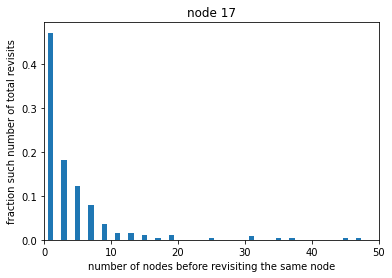

18 [5, 7, 9, 7, 3, 51, 1, 5, 5, 37, 5, 9, 9, 1, 3, 5, 39, 1, 3, 1, 5, 1, 89, 3, 3, 5, 5, 25, 5, 3, 1, 3, 1, 3, 1, 3, 23, 7, 3, 1, 3, 3, 5, 3, 5, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 9, 1, 11, 1, 45, 5, 63, 1, 1, 1, 1, 1, 5, 7, 7, 41, 1, 5, 1, 1, 1, 1, 3, 5, 5, 1, 7, 1, 3, 1, 1, 3, 3, 3, 1, 3, 3, 1, 3, 7, 3, 1, 1, 1, 5, 5, 3, 7]


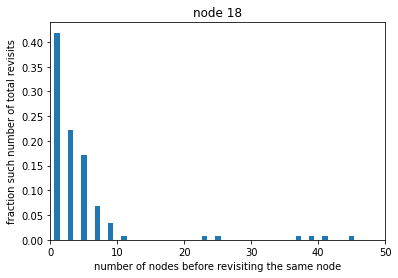

19 [3, 49, 3, 33, 3, 1, 3, 19, 3, 5, 3, 3, 1, 23, 1, 19, 5, 105, 3, 1, 3, 5, 5, 5, 3, 83, 1, 5, 3, 1, 3, 3, 1, 3, 3, 17, 1, 9, 5, 15, 5, 5, 9, 3, 3, 1, 131, 1, 3, 1, 5, 1, 1, 3, 19, 1, 7, 3, 3, 7, 3, 1, 1, 1, 3, 1, 3, 3, 1, 5, 3, 3, 21, 3, 7, 1, 1, 9, 3, 5, 23, 1, 3, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 5, 25, 1, 1, 5, 15, 5, 1, 3, 3, 1, 1, 3, 3, 1, 1, 1, 1, 3, 3, 3, 3, 3, 5, 69, 5, 21, 3, 1, 3]


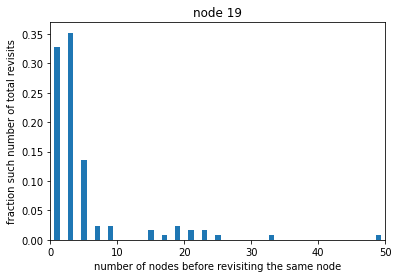

20 [1, 7, 1, 5, 1, 1, 1, 7, 1, 1, 61, 1, 1, 5, 5, 9, 3, 3, 1, 79, 3, 3, 5, 103, 5, 1, 5, 1, 1, 1, 1, 1, 1, 1, 21, 1, 1, 1, 1, 1, 1, 1, 3, 1, 5, 15, 11, 1, 5, 33, 1, 5, 9, 3, 23, 1, 19, 3, 1, 3, 3, 1, 3, 1, 129, 3, 1, 1, 1, 3, 5, 1, 1, 1, 3, 3, 1, 5, 71, 5, 1, 5, 3, 1, 3, 1, 1, 1, 1, 1, 3, 7, 5, 5, 1, 47, 7, 7, 13, 3, 1, 1, 5, 1, 3, 1, 11, 1, 3, 1, 1, 5, 3, 1, 3, 3, 7, 5, 11, 7, 1, 5, 5, 1, 1, 7, 7, 5, 3, 5, 1, 3, 1, 65, 1, 1, 5, 1, 5, 3, 1, 1, 1, 1, 5, 3, 1, 5, 1, 1, 1, 3, 1, 1, 3, 1, 1, 7, 1, 1, 7, 5, 1, 1, 41, 3, 1, 3, 1, 5, 3, 3, 1, 1, 1, 3, 5, 1, 3, 3, 1, 5, 3, 1, 1, 1, 1, 31, 3, 1, 5, 1, 3, 1, 9, 3, 3, 3, 7, 1, 3, 1, 1, 1, 3, 1, 7, 1, 1, 1]


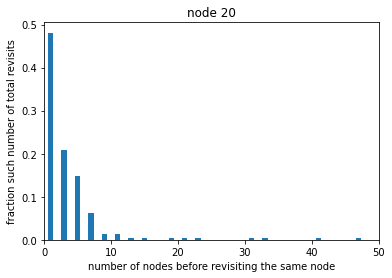

21 [3, 3, 5, 3, 3, 3, 97, 3, 1, 1, 5, 15, 1, 5, 17, 3, 135, 7, 39, 9, 5, 1, 1, 1, 13, 3, 3, 3, 3, 3, 123, 1, 3, 3, 3, 5, 37, 3, 3, 3, 3, 5, 3, 3, 1, 5, 3, 5, 5, 3, 7, 9, 13, 3, 3, 5, 1, 3, 5, 1, 5, 1, 5, 5, 3, 3]


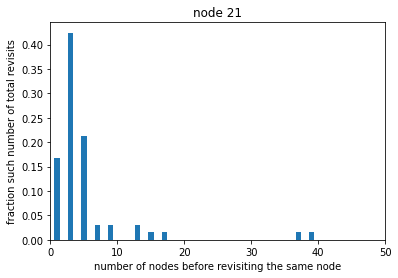

22 [1, 3, 7, 113, 1, 1, 3, 1, 5, 5, 1, 1, 1, 5, 5, 1, 7, 1, 7, 11, 5, 9, 1, 1, 1, 1, 17, 1, 5, 3, 3, 3, 1, 11, 1, 7, 3, 3, 3, 5, 1, 1, 1, 1, 3, 7, 1, 3, 3, 7, 11, 1, 1, 1, 1, 1, 1, 5, 1, 9, 3, 5, 3, 5, 1, 3, 1, 3, 3, 197, 5, 3, 3, 5, 1, 5, 3, 1, 21, 1, 11, 5, 3, 3, 3, 7, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 5, 3, 3, 3, 5, 3, 5, 27, 3, 3, 1, 3, 5, 1]


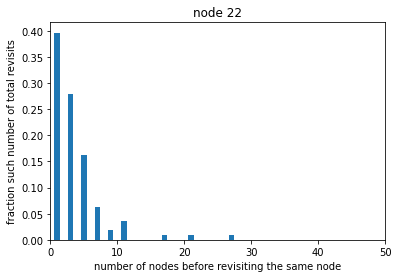

23 [3, 5, 3, 11, 1, 1, 87, 3, 3, 1, 1, 1, 11, 3, 5, 5, 1, 7, 3, 1, 1, 5, 17, 1, 5, 23, 1, 9, 3, 1, 1, 5, 3, 1, 5, 3, 1, 3, 9, 3, 5, 1, 3, 15, 13, 3, 1, 99, 3, 1, 1, 1, 9, 3, 5, 1, 1, 5, 3, 1, 5, 3, 5, 3, 5, 1, 1, 1, 1, 7, 3, 3, 1, 1, 1, 7, 1, 7, 3, 3, 3, 3, 7, 1, 1, 1, 3, 5, 1, 9, 3, 23, 1, 7, 1, 3, 3, 11, 11, 1, 15, 5]


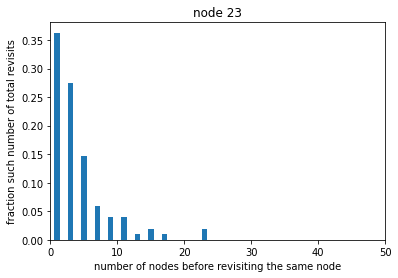

24 [5, 1, 5, 17, 5, 1, 59, 5, 1, 3, 3, 1, 5, 19, 3, 1, 1, 3, 1, 1, 1, 3, 1, 9, 1, 1, 3, 1, 1, 5, 1, 9, 1, 3, 5, 3, 1, 1, 1, 1, 3, 3, 1, 9, 15, 3, 5, 5, 9, 1, 7, 9, 1, 5, 3, 3, 1, 1, 1, 7, 7, 1]


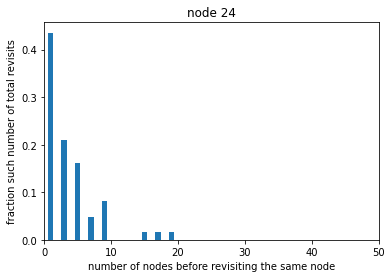

25 [7, 1, 3, 9, 21, 15, 1, 3, 1, 1, 7, 15, 5, 1, 1, 1, 1, 1, 3, 3, 3, 17, 3, 5, 9, 9, 5, 1, 27, 3, 7, 3, 55, 7, 7, 3, 3, 3, 3, 5, 3, 13, 3, 5, 5, 3, 3, 1, 3, 1, 3, 3, 7, 1, 9, 1, 3, 7, 3, 1, 5, 1, 9, 3, 1, 35, 3, 1, 81, 1, 1, 3, 5, 1, 7, 3, 3, 1, 3, 7, 3, 3, 5, 1, 3, 9, 3, 1, 3, 3, 3, 3, 3, 3, 7, 3, 69, 3, 7, 153, 3, 7, 5, 7, 7, 7, 1, 7, 1, 1, 19, 7, 3, 3, 5, 5, 5, 9, 9, 3, 5, 9, 1, 7, 1, 5, 5, 9, 25, 3, 1, 3, 1, 5, 3, 45, 3, 1, 1, 5, 1, 1]


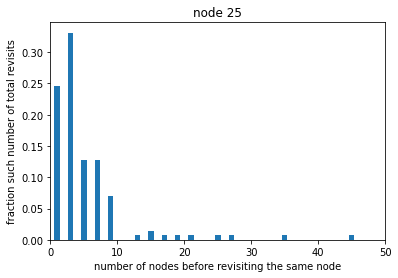

26 [9, 7, 81, 1, 3, 3, 3, 23, 3, 1, 1, 3, 7, 1, 1, 5, 5, 3, 3, 3, 5, 5, 7, 1, 3, 1, 1, 1, 7, 1, 19, 1, 1, 1, 9, 3, 3, 3, 3, 1, 3, 3, 3, 7, 3, 7, 3, 1, 3, 1, 1, 1, 1, 1, 3, 3, 3, 3, 1, 3, 1, 3, 11, 1, 1, 3, 3, 3, 3, 39, 13, 3, 3, 1, 1, 3, 3]


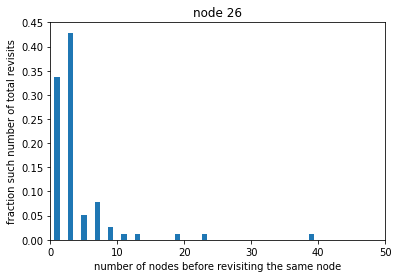

27 [3, 1, 1, 1, 1, 7, 1, 3, 1, 1, 5, 5, 1, 5]


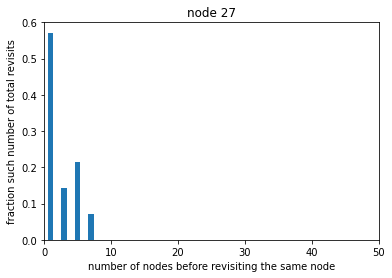

28 [5, 1, 1, 1, 3, 9, 3, 3, 3, 7, 5, 7, 155, 3, 1, 1, 1, 1, 1, 1, 3, 1, 3, 3, 5]


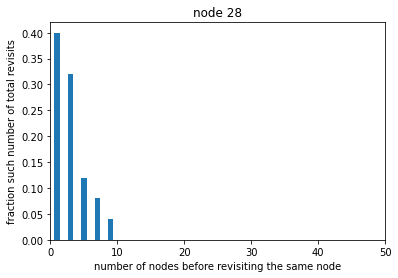

29 [3, 5, 3, 5, 3, 1, 5, 3, 7, 5, 7, 1, 1, 179, 3, 1, 3, 1, 1, 5, 1, 3, 1, 1]


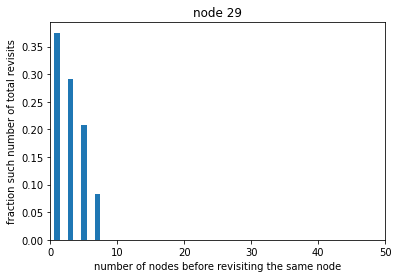

30 [3, 5, 3, 7, 3, 13, 9, 5, 5, 1, 3, 1, 11, 3, 1, 3, 7, 3, 7, 1, 1, 7, 57, 3, 3, 3, 3]


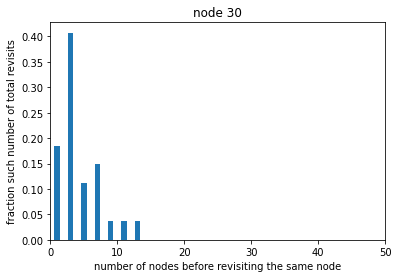

31 [9, 1, 1, 1, 1, 37, 1, 7, 1, 1, 49, 1, 1, 1, 233, 1, 1, 9, 1, 1, 1, 35, 1, 1, 35, 1, 143, 1, 25, 11, 1, 1, 1, 1, 1, 1, 23, 1, 3, 1, 1, 1, 1, 47, 1, 1, 1, 1, 1, 1, 1, 69, 97, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 11, 1, 53, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 37, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 145, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 9, 1, 1, 1, 1, 1, 1, 1, 29, 1, 1, 1, 1, 1, 33, 1, 11, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 15, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 73, 1, 3]


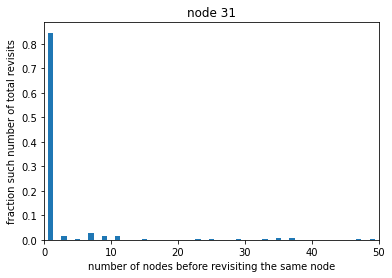

32 [1, 1, 1, 43, 1, 5, 1, 1, 51, 1, 9, 1, 1, 1, 1, 1, 43, 1, 1, 1, 169, 7, 1, 1, 1, 1, 27, 1, 5, 1, 1, 141, 1, 23, 1, 1, 1, 1, 9, 1, 1, 1, 1, 1, 1, 1, 1, 9, 1, 1, 1, 1, 49, 1, 1, 69, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 43, 1, 1, 13, 1, 1, 1, 1, 5, 5, 1, 1, 1, 1, 63, 1, 1, 1, 31, 1, 1, 1, 1, 1, 11, 1, 1, 7, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 29, 1, 1, 1, 1, 1, 27, 1, 1, 1, 1, 1, 1, 1, 1, 29, 1, 1, 1, 1, 3, 1, 81, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 47, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


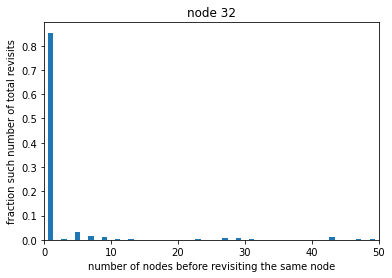

33 [1, 11, 1, 1, 1, 1, 1, 75, 1, 1, 81, 1, 1, 1, 5, 1, 25, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


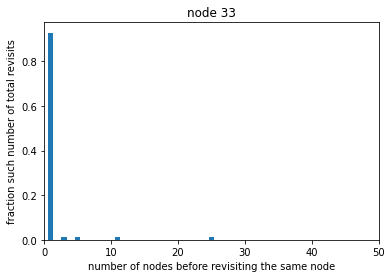

34 [1, 1, 1, 1, 7, 1, 1, 1, 1, 1, 1, 31, 1, 1, 7, 1, 73, 1, 1, 1, 41, 1, 1, 47, 1, 5, 1, 19, 5, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 51, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


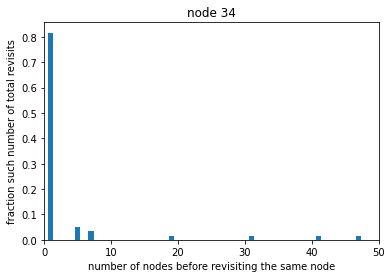

35 [1, 1, 41, 1, 1, 3, 1, 23, 1, 17, 5, 1, 1, 1, 1, 7, 1, 1, 1, 5, 25, 7, 5, 1, 1, 1, 49, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 15, 59, 1, 1, 1, 25, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 57, 1, 1, 1, 1, 1, 33, 1, 23, 1, 15, 1, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 45, 1, 1, 1, 1, 97, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 125, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


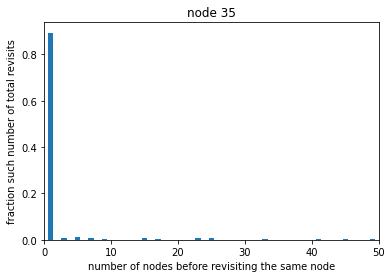

36 [1, 1, 1, 1, 1, 39, 1, 1, 1, 7, 25, 23, 1, 11, 1, 1, 9, 1, 23, 1, 3, 1, 1, 3, 11, 1, 1, 1, 1, 1, 1, 1, 27, 1, 1, 1, 1, 1, 1, 1, 1, 79, 1, 89, 1, 1, 1, 1, 1, 1, 1, 1, 1, 9, 1, 1, 27, 1, 41, 1, 1, 21, 1, 19, 1, 1, 1, 1, 1, 29, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 13, 11, 1, 1, 1, 1, 1, 13, 1, 63, 1, 1, 1, 1, 1, 1, 1, 33, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 89, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1]


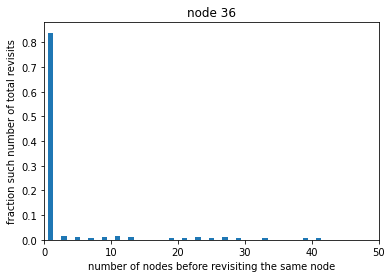

37 [1, 1, 1, 11, 1, 1, 1, 65, 1, 1, 45, 1, 1, 1, 1, 17, 1, 1, 43, 1, 1, 7, 95, 1, 1, 1, 1, 1, 1, 33, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 25, 47, 1, 1, 65, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1]


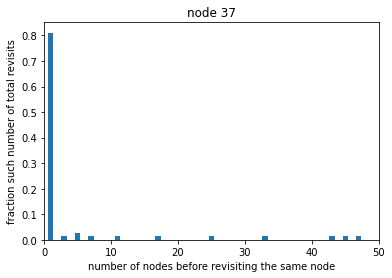

38 [1, 1, 9, 1, 1, 1, 1, 9, 1, 53, 1, 1, 1, 45, 1, 1, 21, 1, 1, 47, 7, 1, 1, 93, 1, 1, 1, 1, 25, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 39, 1, 1, 1, 133, 1, 1, 1, 1, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 11, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1]


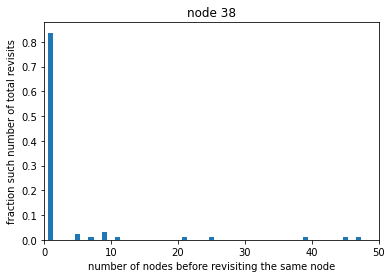

39 [1, 65, 1, 1, 1, 1, 25, 133, 1, 1, 1, 1, 1, 1, 7, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 23, 1, 1, 1, 1, 1, 1, 1, 1, 21, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1]


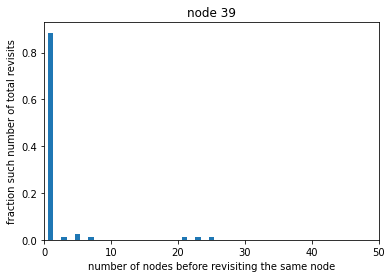

40 [1, 89, 1, 3, 1, 25, 1, 1, 1, 1, 117, 1, 1, 1, 1, 1, 1, 1, 1, 1, 19, 1, 1, 1, 1, 1, 1, 1, 1, 135, 1, 1, 1, 1, 1, 1, 27, 1, 11, 1, 1, 1, 1, 1, 1, 27, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 23, 1, 1]


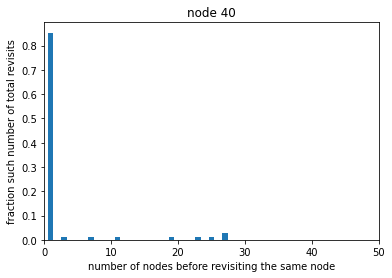

41 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 65, 1, 13, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 75, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 49, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 9, 1, 1, 13, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 5]


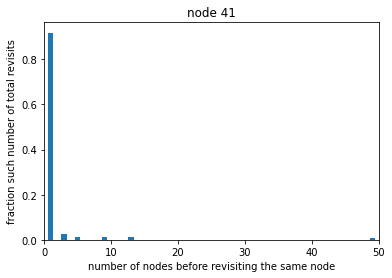

42 [1, 1, 85, 1, 1, 17, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 37, 1, 1, 1, 1, 1, 1, 1, 47, 1, 5, 1, 1, 1, 1, 131, 1, 3, 1, 1, 7, 1, 1, 1, 79, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 35, 1, 1, 1, 1, 1, 9, 1]


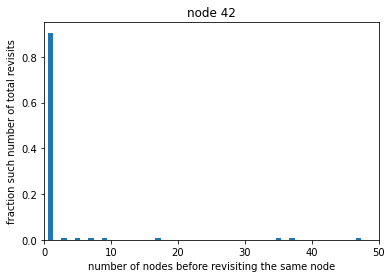

43 [1, 125, 1, 1, 17, 1, 1, 19, 1, 1, 1, 1, 51, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


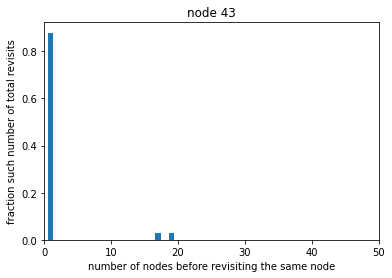

44 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 99, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 25, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


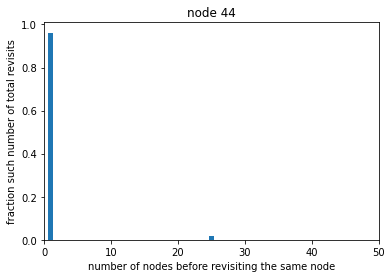

45 [1, 1, 1, 123, 1, 1, 1, 1, 1, 1, 1, 17, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 39, 1, 1, 1, 1]


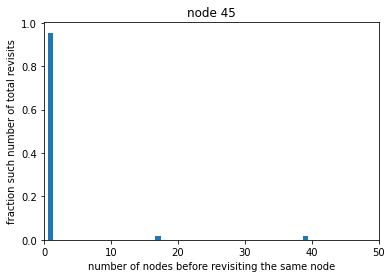

46 [1, 1, 123, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 17, 1, 1, 21, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 25, 1, 1, 1, 1, 1, 1, 1, 199, 1, 1, 1, 1, 1, 1, 1, 23, 13, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 29, 1, 1, 1]


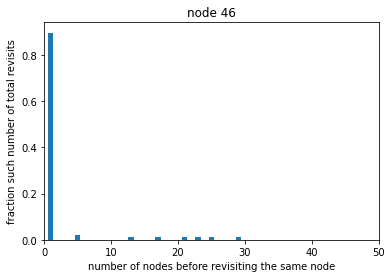

47 [1, 7, 1, 13, 91, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 19, 31, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 15, 1, 103, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


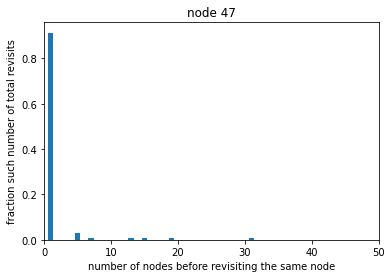

48 [1, 1, 19, 93, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 35, 105, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


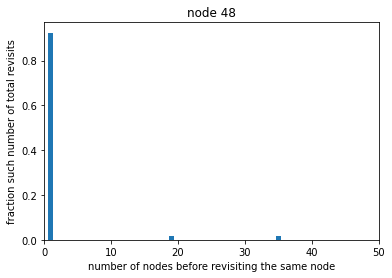

49 [1, 1, 1, 25, 1, 1, 63, 1, 1, 1, 1, 1, 1, 11, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 17, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1]


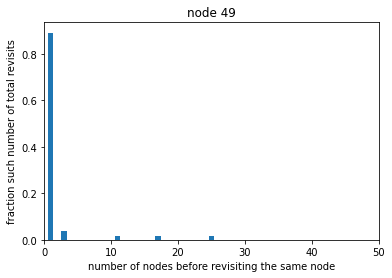

50 [1, 1, 25, 67, 1, 1, 1, 21, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


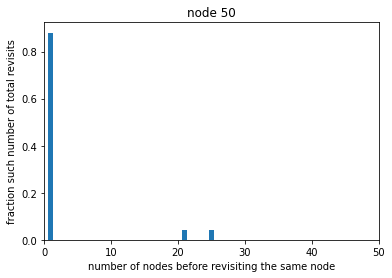

51 [1, 1, 55, 1, 1, 1, 1, 1, 25, 11, 1, 1, 1, 19, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 33, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 5, 1, 1, 15, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 37, 1, 87, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 9, 1, 1, 1, 1, 1, 1, 159, 1, 1, 1, 31, 1, 1, 1, 1, 1, 1, 1, 1, 9]


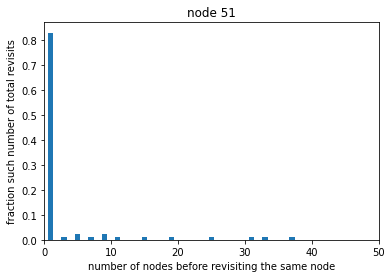

52 [1, 1, 1, 7, 1, 1, 1, 1, 39, 1, 1, 29, 1, 1, 1, 3, 1, 1, 1, 1, 31, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 13, 1, 1, 43, 83, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 71, 1, 1, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 21, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 17, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 27, 1, 1, 1, 1, 1, 1, 1, 1, 1, 47, 1, 1, 1, 1, 1]


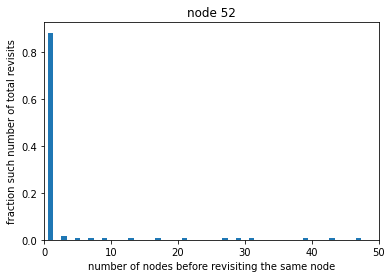

53 [1, 1, 1, 89, 1, 1, 1, 25, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 1, 1, 1, 3, 1, 9, 1, 41, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


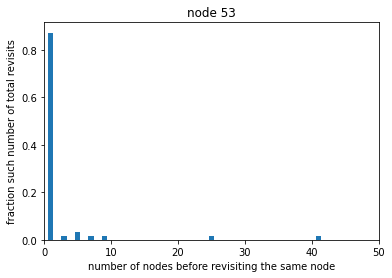

54 [1, 1, 1, 1, 91, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 21, 1, 1, 1, 1]


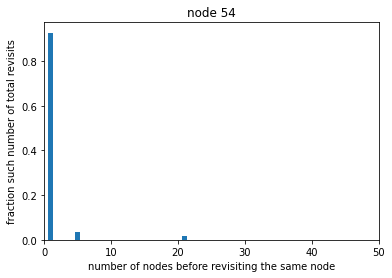

55 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


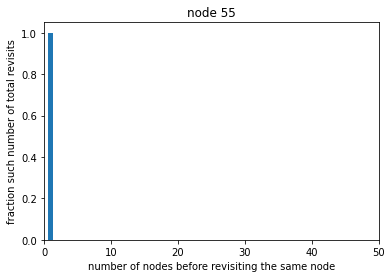

56 [1, 1, 1]


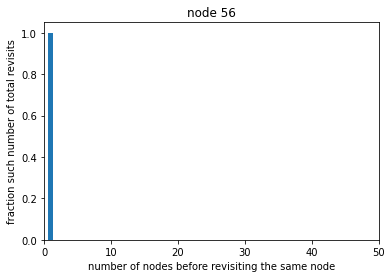

57 [1, 1, 1, 5, 1, 11, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


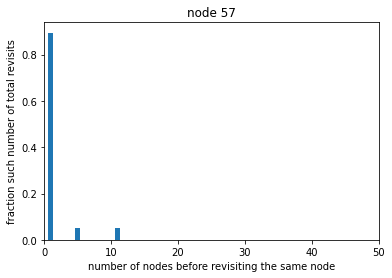

58 [1, 1, 1, 1, 1, 1, 1, 1, 1]


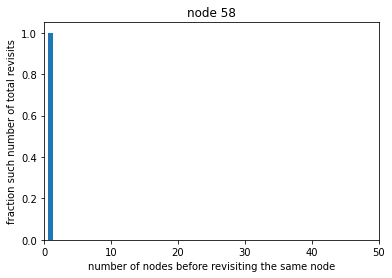

59 [1, 1, 1, 1, 1, 1, 1, 1, 185, 1, 1, 1, 5]


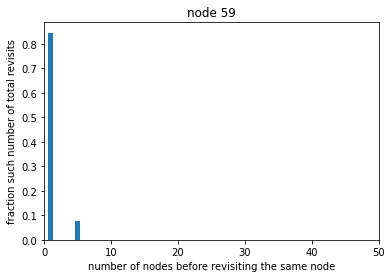

60 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 185, 1, 1, 1]


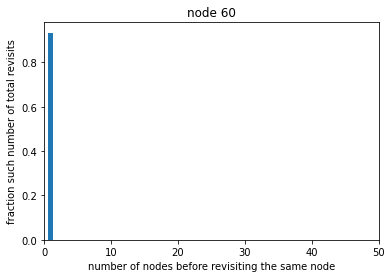

61 [1, 11, 1, 1, 1, 1, 1, 25, 1, 1, 1, 1, 1, 9, 1, 1, 1, 1, 1, 1]


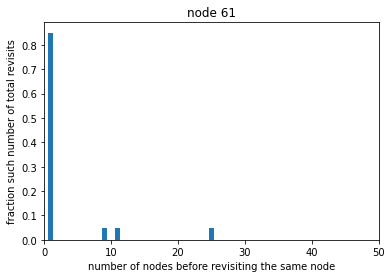

62 [1, 1, 1, 1, 27, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 59, 1, 1, 1, 1]


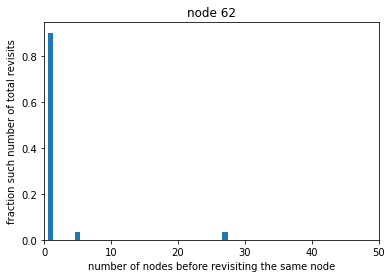

63 [3, 41, 11, 51, 239, 1, 39, 145, 39, 27, 3, 49, 1, 3, 3, 3, 1, 3, 5, 1, 3, 41, 1, 5, 1, 5, 1, 1, 3, 155, 3, 9, 11, 1, 1, 1, 31, 3, 3, 3, 1, 5]


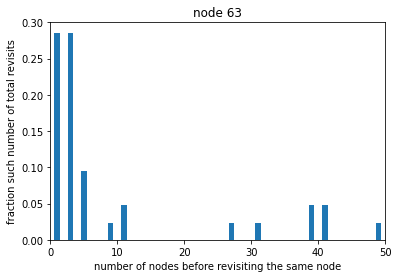

64 [3, 49, 57, 1, 29, 5, 1, 9, 1, 3, 5, 1, 1, 1, 3, 1]


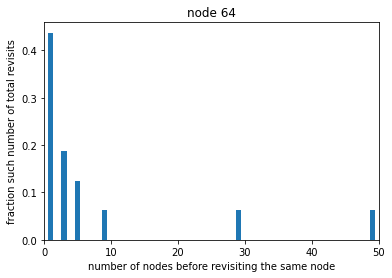

65 [3, 45, 7, 55, 11, 3, 49, 1, 1, 179, 1, 1, 7, 1, 143, 25, 1, 1, 1, 3, 53, 1, 1, 1, 7, 1, 5, 45, 19, 35, 1, 1, 7, 1, 11, 1, 3, 3, 31, 3, 31, 5, 1, 3, 3, 1, 1, 1, 9, 1, 5]


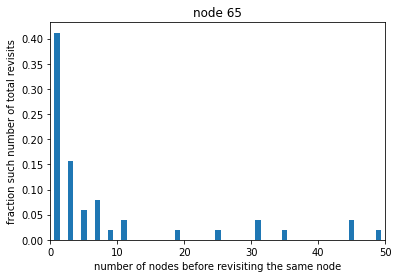

66 [57, 67, 3, 1, 227, 1, 1, 1, 3, 11, 51, 15, 3, 13, 3, 3, 13, 35, 31, 1, 3, 1, 5, 83, 3, 3, 1, 1, 1, 1, 1, 3, 3, 3, 5, 1, 1, 1, 3, 1, 49, 1, 1, 1, 1, 3, 3, 3]


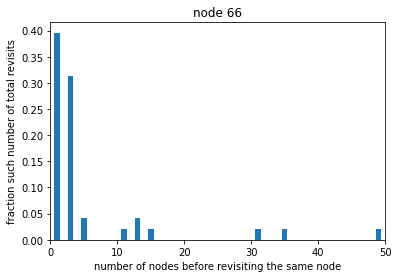

67 [83, 3, 1]


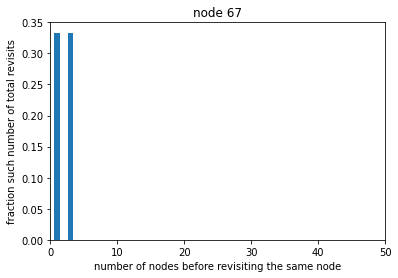

68 [13, 87, 7, 27, 1, 1, 1, 3, 1, 13]


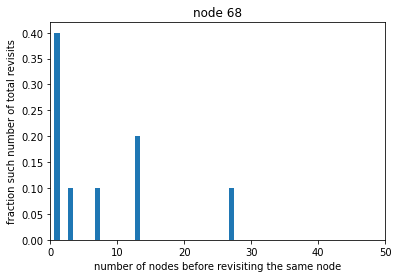

69 [15, 77, 1, 27, 1]


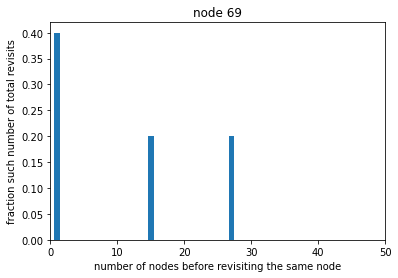

70 [3, 1, 9, 1, 85]


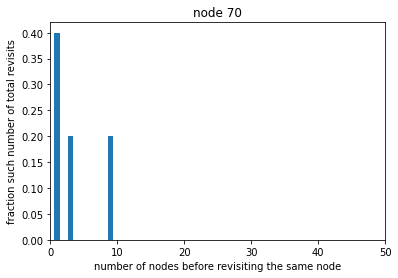

71 [45, 33, 25, 1, 3, 9, 1, 1, 47, 1, 55, 1, 1, 3, 1, 27, 1, 3, 61, 1, 1, 1, 35, 17, 1, 1, 1, 1, 1, 3, 1, 1, 3, 5, 1, 1, 1, 1, 1, 1, 3, 23, 35, 1, 27, 1, 9, 1, 3, 127, 1, 1, 3, 1, 3, 1, 5, 3, 1, 1, 3, 1, 3, 1, 1, 9, 1, 1, 1, 7, 1]


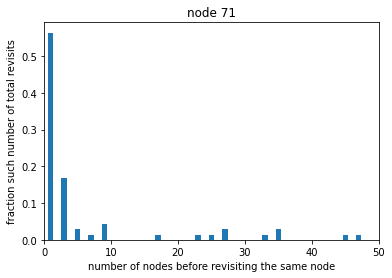

72 [45, 129, 59, 1, 1, 3, 1, 3, 137, 1, 1, 1, 3, 3, 63, 1, 3, 5]


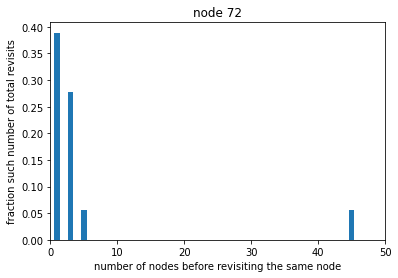

73 [3, 1, 43, 1, 61, 13, 13, 25, 7, 19, 1, 1, 3, 1, 29, 3, 81, 91, 1, 1, 3, 13, 43, 25, 21, 25, 1, 1, 3, 3, 3, 3, 35, 3, 3, 1, 3, 1, 1, 99]


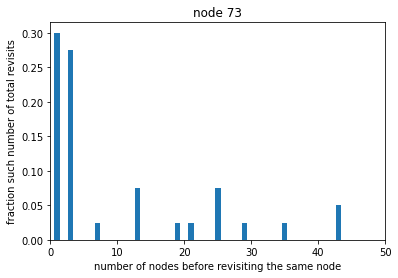

74 [191, 7, 13, 3, 1, 1, 21, 101, 1, 1, 3, 1, 1, 1, 5, 3]


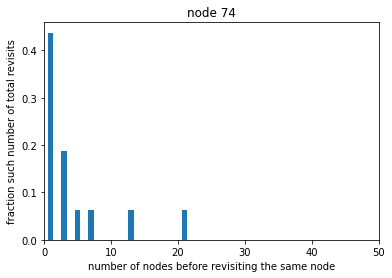

75 [1, 15, 1, 69, 51, 1, 21, 159, 35, 5]


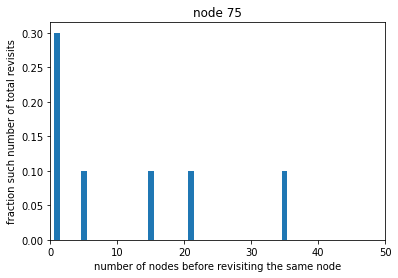

76 [17, 71, 49, 1, 23, 47, 107, 3, 75, 1, 1, 1]


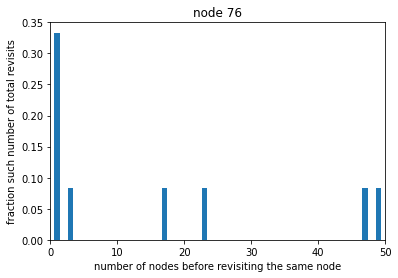

77 [13, 5, 11, 57, 49, 87, 31, 11, 3, 3, 1, 3, 1]


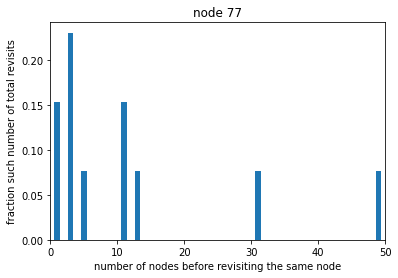

78 [13, 1, 73, 49, 25, 57, 97, 1, 9, 41, 15, 7, 1, 3, 1, 7, 1]


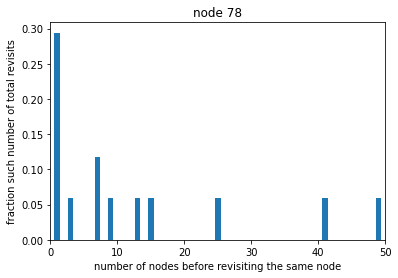

79 [67, 5, 11, 1, 1, 27, 1, 33, 3, 3, 3, 1]


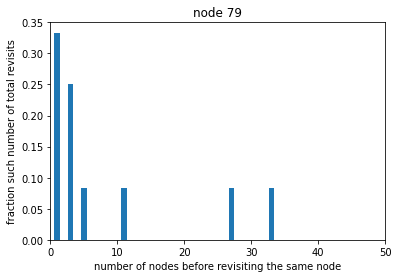

80 [27, 27, 1]


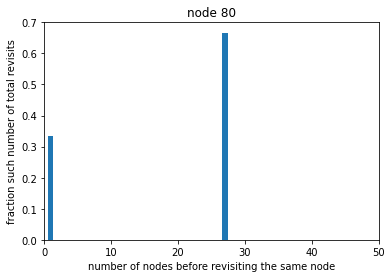

81 [123, 1, 5, 139, 29, 1, 1, 1, 1, 1, 1, 27]


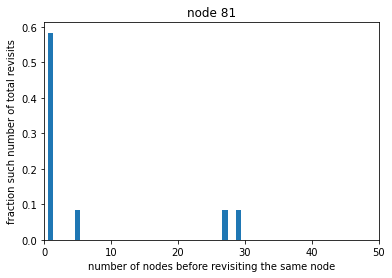

82 [91, 5, 29, 119, 1, 5, 3, 3, 3]


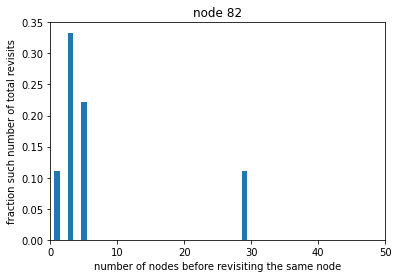

83 [3, 3, 1, 3, 53, 1, 3, 1, 1, 17, 1, 5, 1, 3, 1, 1, 11, 1, 5, 5, 3, 1, 1, 1, 3, 3, 3, 1, 7]


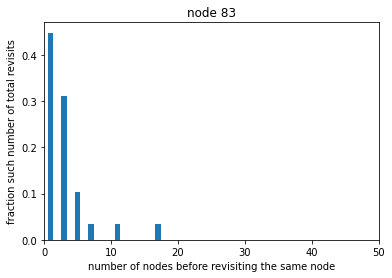

84 [1, 3, 85, 1, 1, 1, 1, 1, 1, 3, 3, 5, 3, 1, 1, 1, 59, 29, 1, 3, 1, 1, 1, 1]


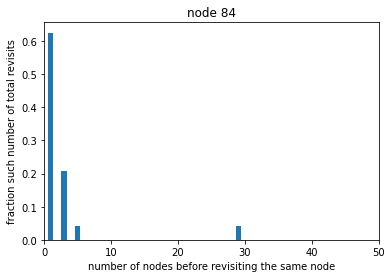

85 [19, 1, 1, 1, 1, 1, 1, 1, 1, 1, 23, 41, 1, 1]


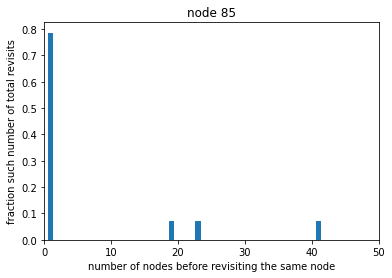

86 [1, 87, 7, 41, 3, 1, 49, 135, 1, 1, 1, 1, 1]


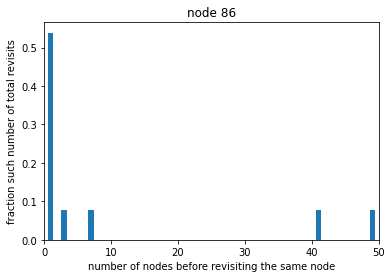

87 [3, 53, 1, 3, 3]


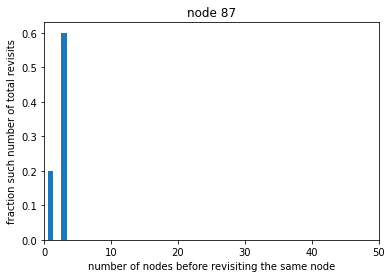

88 [21, 57]


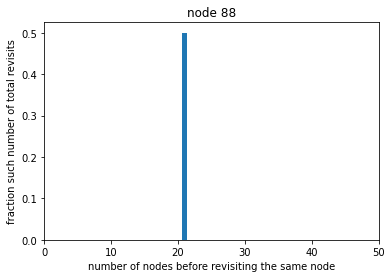

89 [3, 1, 3, 3, 105, 1, 1, 1, 1, 3, 1, 1, 27, 3, 1]


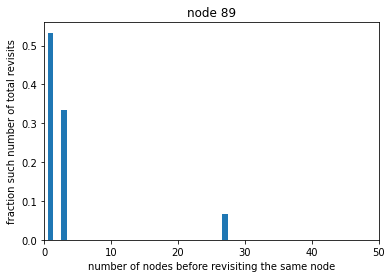

90 []


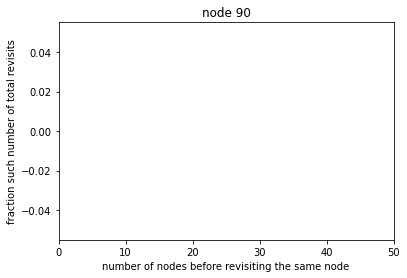

91 [3]


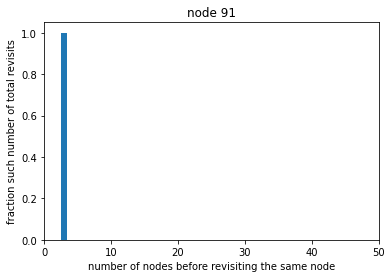

92 [1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1]


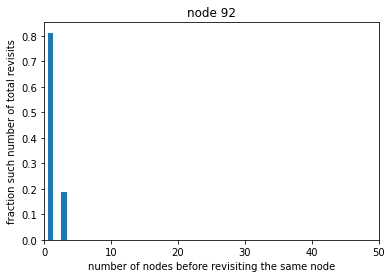

93 [47, 3, 33, 1, 13]


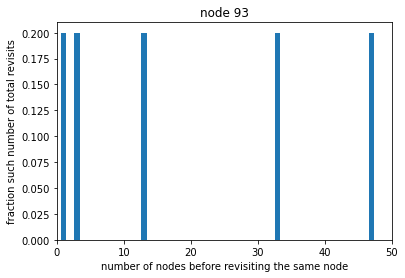

94 [1, 1, 1, 1, 1, 1, 1, 51, 3, 3, 1, 27, 1, 1, 7, 1, 7, 31]


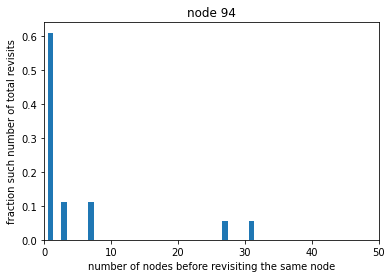

95 [1, 1, 1, 1, 1, 5, 11, 1, 1, 1, 1, 1, 1, 19, 105, 11, 1, 1, 7, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5]


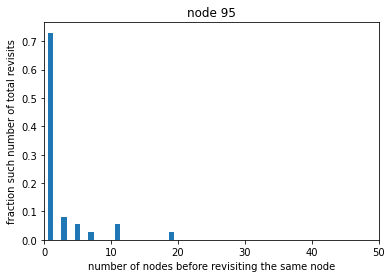

96 [107, 1, 1, 1, 9, 1, 1, 7, 133, 5, 25, 1, 3, 23, 3, 1, 1]


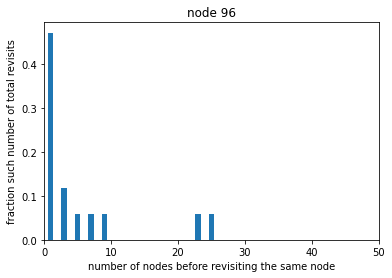

97 [117, 1, 1, 5, 1]


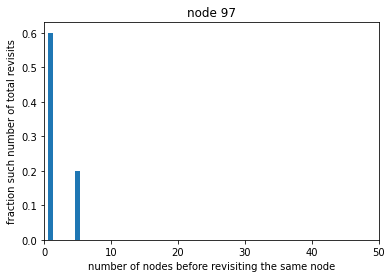

98 [3, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1]


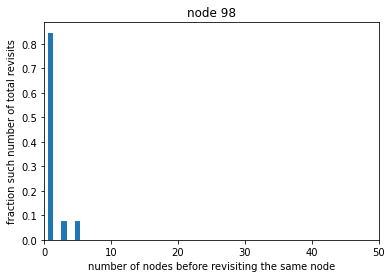

99 [29, 67, 5, 1, 1, 1, 1, 3, 3, 3, 9, 1]


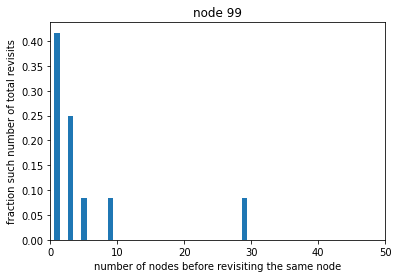

100 [33, 67, 1, 3, 1, 1]


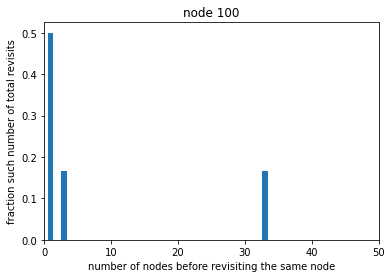

101 []


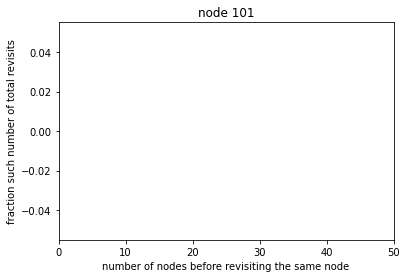

102 [25, 1]


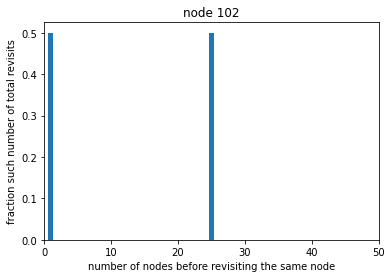

103 [79, 3, 1, 1, 1, 1, 1, 1, 1, 1, 7, 3, 3, 1, 1, 1, 3, 167, 1, 3, 1, 1]


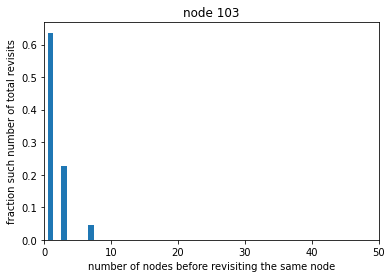

104 [61, 3, 39, 3, 21, 9, 3, 17, 5, 1, 161, 3]


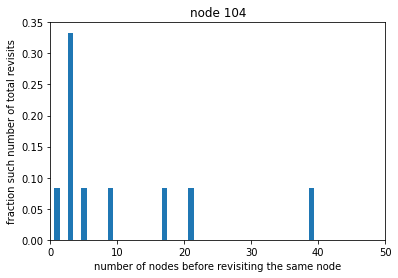

105 [3, 9, 1, 1, 45, 31, 1, 13, 33, 5, 3, 1, 1, 3, 1, 79, 11, 1, 1, 1, 3, 27, 1, 1, 1, 1, 1, 27, 1, 1, 1, 31, 5, 1, 3, 49, 1]


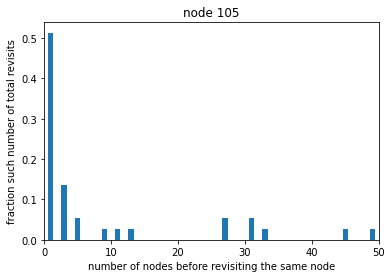

106 [17, 127, 3, 3, 1, 33, 3, 25]


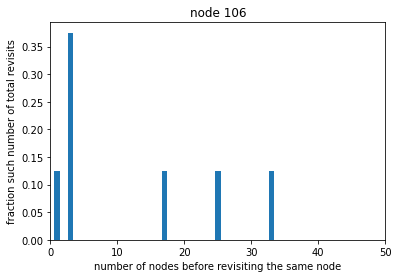

107 [1, 95, 27, 1, 1, 1, 3, 1, 1, 1, 1, 7, 11, 47, 3, 1, 3]


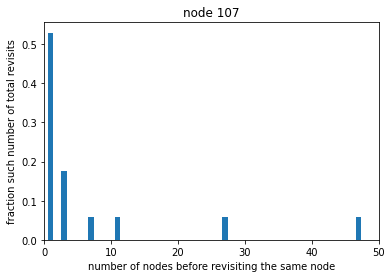

108 [95, 1, 1, 3, 81, 1, 3]


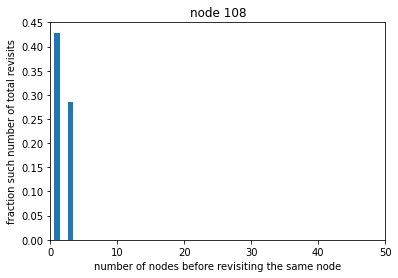

109 [1, 3, 3, 3, 35, 3]


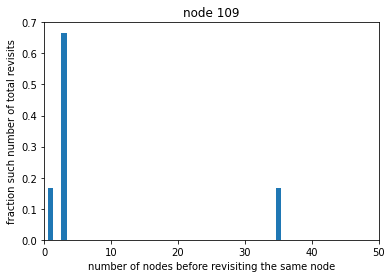

110 [5, 95, 3, 1, 7, 1, 13, 23]


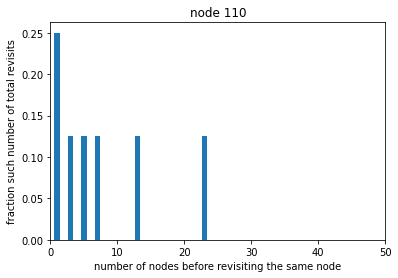

111 [1, 1]


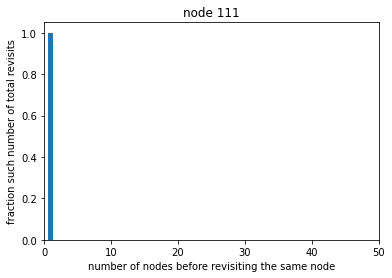

112 []


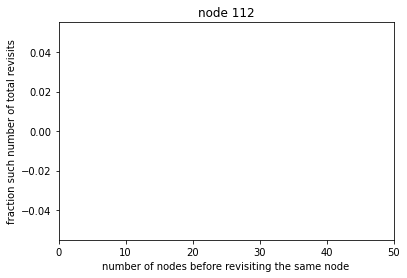

113 [1]


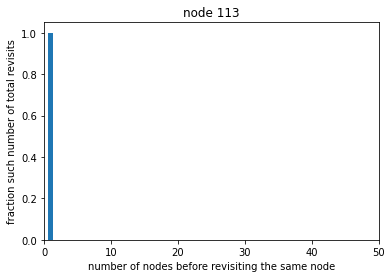

114 []


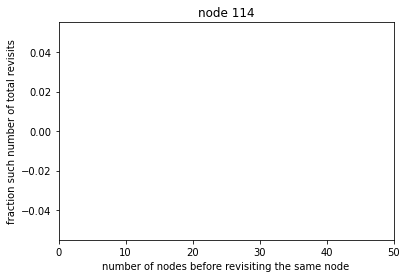

115 [11]


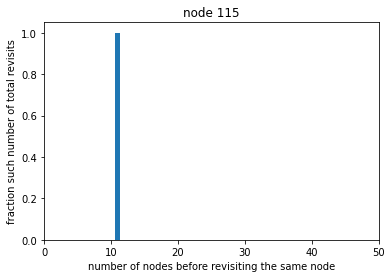

116 [23, 1]


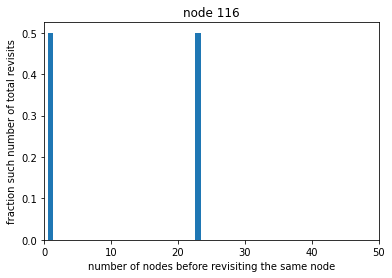

117 [3]


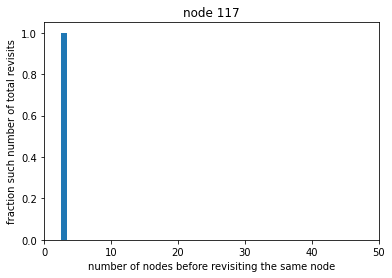

118 []


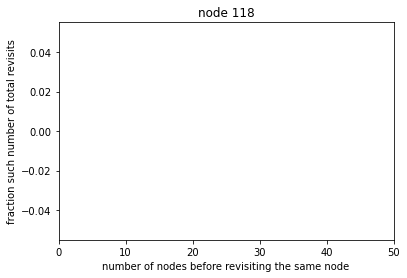

119 [1, 1]


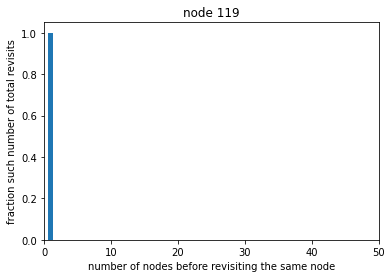

120 []


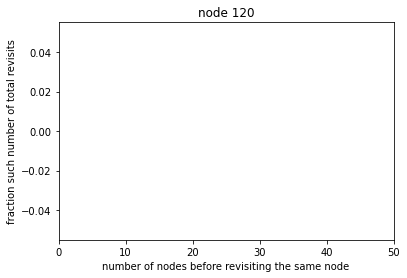

121 [1, 1, 1, 189]


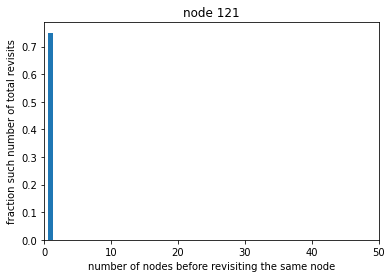

122 []


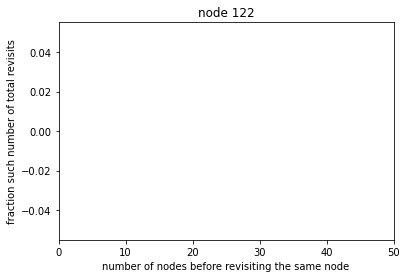

123 [33, 1]


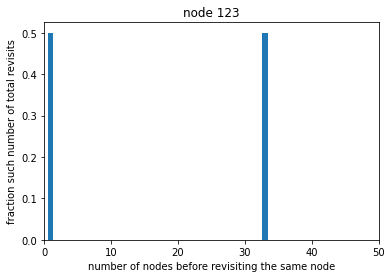

124 [13, 1, 5, 27]


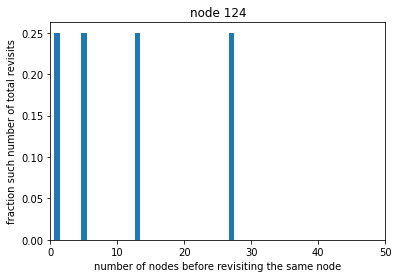

125 [35, 1, 3, 3, 1]


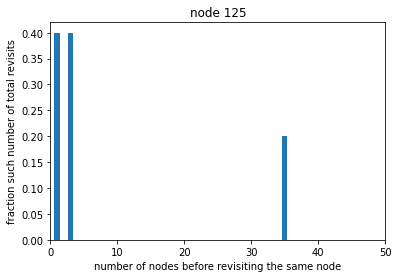

126 [5, 29, 5, 1, 3, 3, 61, 3]


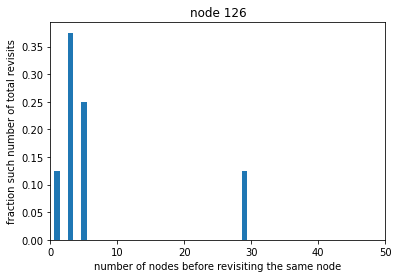

127 []


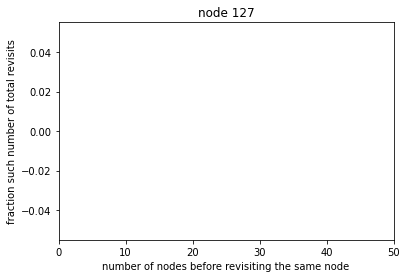

In [110]:
# Plot each node

revisit = get_revisits('B7', 'all')
for node in p.ALL_VISITABLE_NODES:
    print(node, revisit[node])
    total = len(revisit[node])
    d = {x: revisit[node].count(x)/total for x in revisit[node]}
    plt.bar(d.keys(), d.values())
    plt.title(f"node {node}")
    plt.xlabel("number of nodes before revisiting the same node")
    plt.ylabel("fraction such number of total revisits")
    plt.xlim([0, 50])
    plt.show()

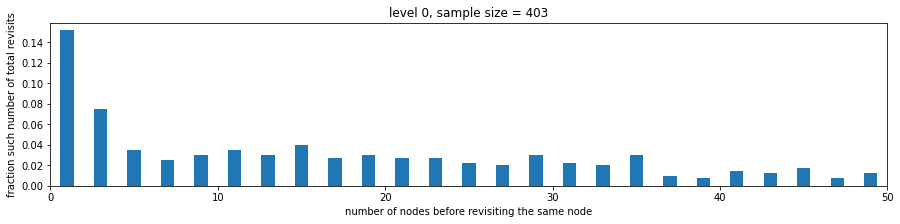

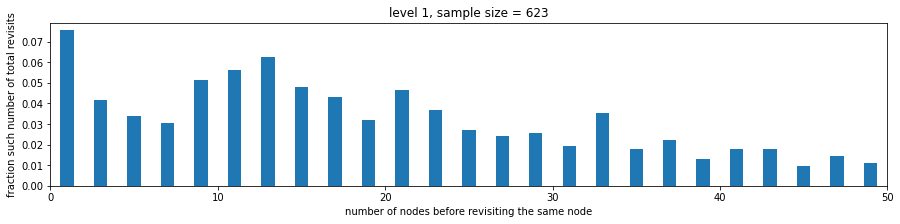

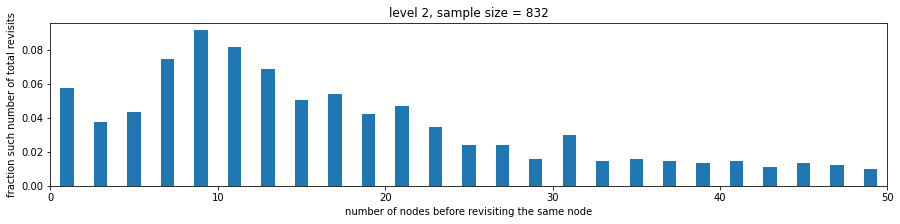

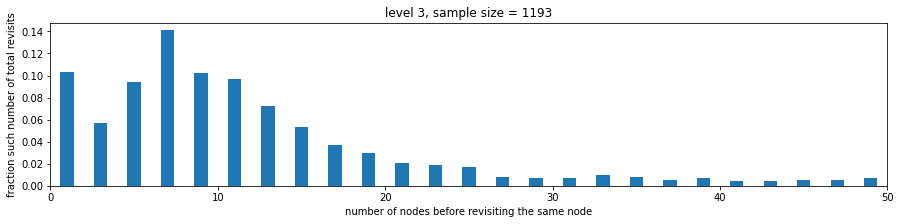

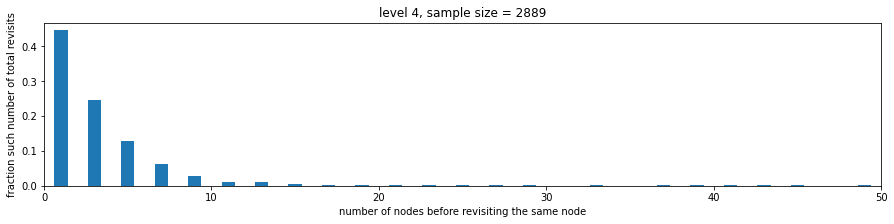

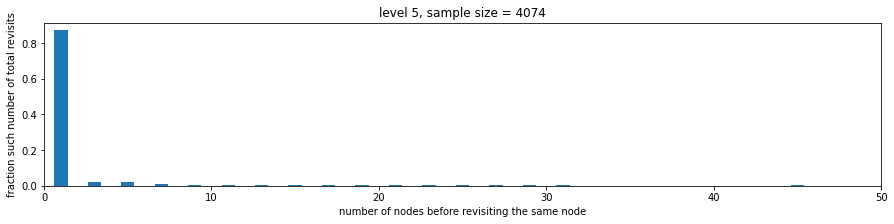

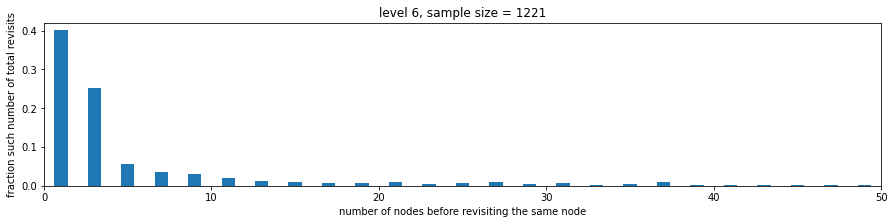

In [155]:
# Plot by level

revisit = get_revisits('B6','all')
for level in p.NODE_LVL:
    plt.figure(figsize=(15, 3))
    to_plot = []
    for node in p.NODE_LVL[level]:
        to_plot += revisit[node]
    total = len(to_plot)
    d = {x: to_plot.count(x)/total for x in to_plot}
    d = dict(filter(lambda item: item[0] <= 50, d.items()))
    plt.bar(d.keys(), d.values())
    plt.title(f"level {level}, sample size = {len(to_plot)}")
    plt.xlabel("number of nodes before revisiting the same node")
    plt.ylabel("fraction such number of total revisits")
    plt.xlim([0, 50])
    plt.show()

In [124]:
# Looks like before revisiting a node in level 6, it goes 1 step and comes back or goes 3 steps and comes back 
# and this forms ~65% of the revisits to them

# For level 5, revisiting after 1 node is common (probably from neighbour level 6 nodes as one would expect)

# Even for level 4, revisiting after 1 node is fairly frequent. (Could it denote reaching this level is enough for rat
# to be decently certain about what could be next? Revisiting after 3 nodes partially agrees with it but 
# revisiting after 5 nodes means it visited all the nodes in the subtree). High number of revisits after 1 node in 
# level 4 means a lot of back and forth

# From level 3 to level 1, it gets more uniform. What does it mean? Let's check if it became uniform with time.

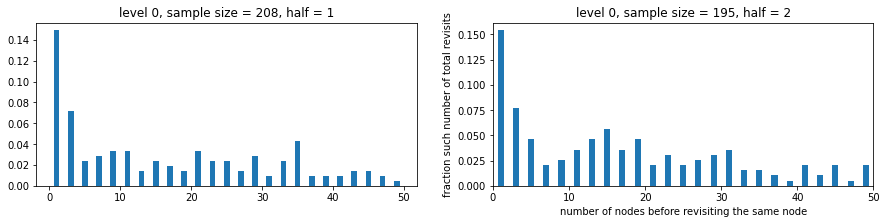

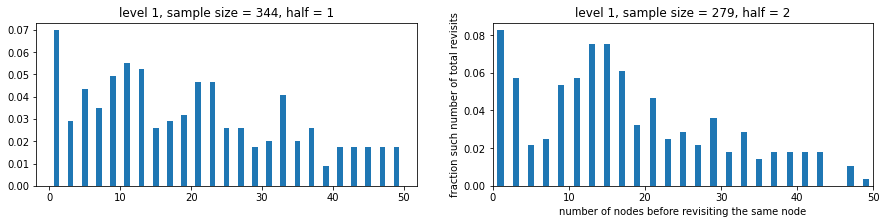

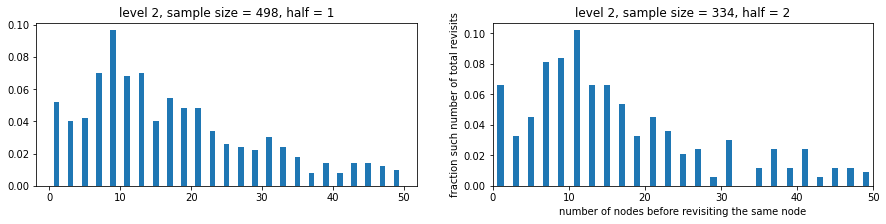

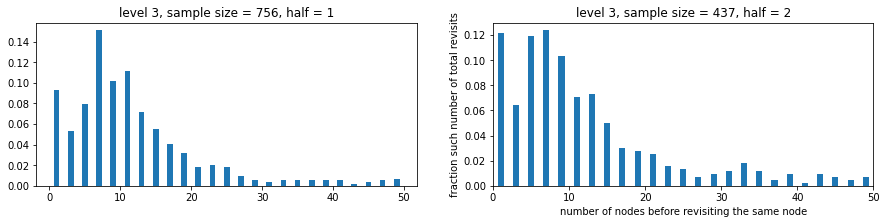

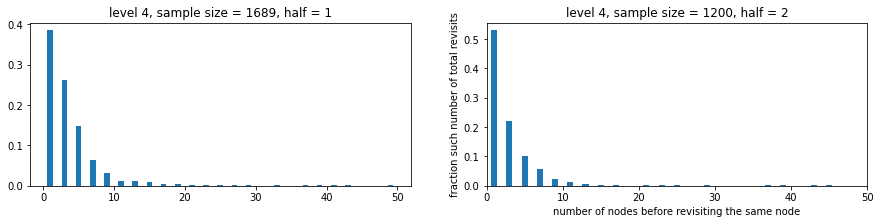

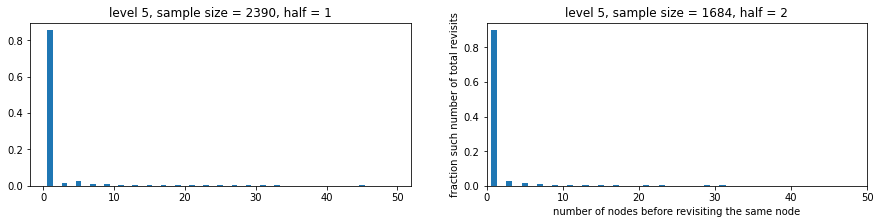

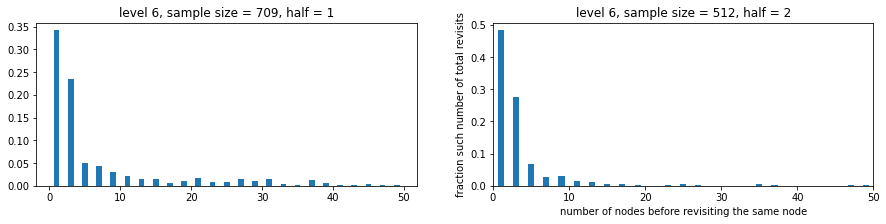

In [154]:
# Plot by level but 2 separate phases

revisit_phase = [None, None]
revisit_phase[0] = get_revisits('B6','first_half')
revisit_phase[1] = get_revisits('B6','second_half')

for level in p.NODE_LVL:
    fig, ax = plt.subplots(1, 2, figsize=(15, 3))
    for half in [0, 1]:
        revisit = revisit_phase[half]
        to_plot = []
        for node in p.NODE_LVL[level]:
            to_plot += revisit[node]
        total = len(to_plot)
        d = {x: to_plot.count(x)/total for x in to_plot}
        d = dict(filter(lambda item: item[0] <= 50, d.items()))
        ax[half].bar(d.keys(), d.values())
        ax[half].set_title(f"level {level}, sample size = {len(to_plot)}, half = {half+1}")
    plt.xlabel("number of nodes before revisiting the same node")
    plt.ylabel("fraction such number of total revisits")
    plt.xlim([0, 50])
    plt.show()

In [138]:
# Hmm, not really a big difference in early and later part of the night. Let's check when divided into 3 phases
# and try to conclude.

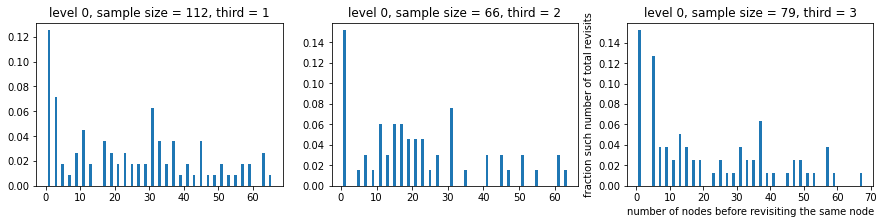

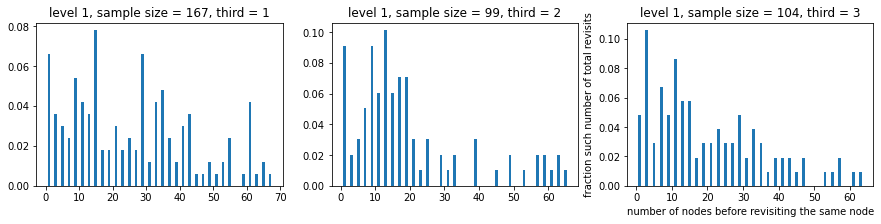

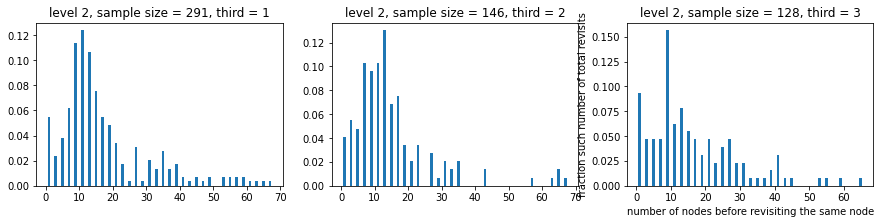

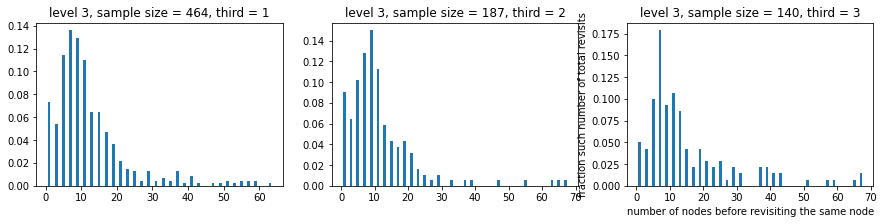

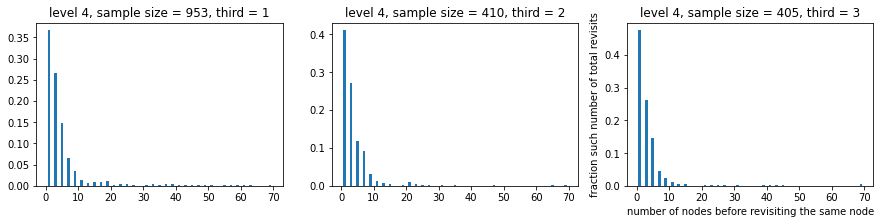

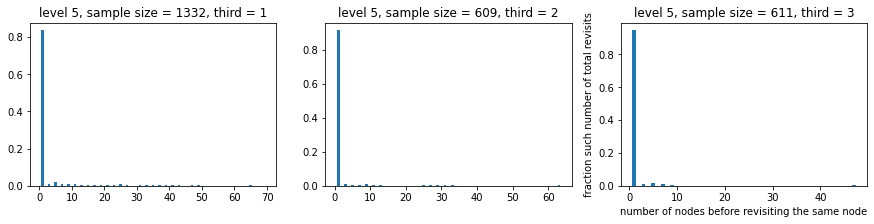

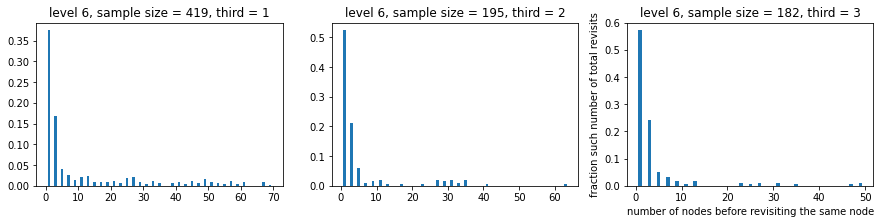

In [153]:
# Plot by level but 3 separate phases

revisit_phase = [None, None, None]
revisit_phase[0] = get_revisits('B7','first_third')
revisit_phase[1] = get_revisits('B7','second_third')
revisit_phase[2] = get_revisits('B7','third_third')

for level in p.NODE_LVL:
    fig, ax = plt.subplots(1, 3, figsize=(15, 3))
    for third in [0, 1, 2]:
        revisit = revisit_phase[third]
        to_plot = []
        for node in p.NODE_LVL[level]:
            to_plot += revisit[node]
        total = len(to_plot)
        d = {x: to_plot.count(x)/total for x in to_plot}
        d = dict(filter(lambda item: item[0] <= 70, d.items()))
        ax[third].bar(d.keys(), d.values())
        ax[third].set_title(f"level {level}, sample size = {len(to_plot)}, third = {third+1}")
    plt.xlabel("number of nodes before revisiting the same node")
    plt.ylabel("fraction such number of total revisits")
    plt.show()

In [156]:
# For level 4 and 6, the fraction to revisit after 1 node increases over time. 
# Even for level 3, the fraction is consistent with peak around 9 to 11 nodes between revisits. To fully cover 
# a subquarter, it will need 13 visits. So it only skips few nodes most time.

# For level 0, pretty uniform again. (So we didn't get the answer to it)